# DMT-Assignment01-Task01-Preprocess

## Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

In [2]:
# read data from file
dataset = pd.read_csv("dataset_mood_smartphone.csv")
dataset

Unnamed: 0       id                     time        variable   value
0                1  AS14.01  2014-02-26 13:00:00.000            mood   6.000
1                2  AS14.01  2014-02-26 15:00:00.000            mood   6.000
2                3  AS14.01  2014-02-26 18:00:00.000            mood   6.000
3                4  AS14.01  2014-02-26 21:00:00.000            mood   7.000
4                5  AS14.01  2014-02-27 09:00:00.000            mood   6.000
...            ...      ...                      ...             ...     ...
376907     2770399  AS14.30  2014-04-11 07:51:16.948  appCat.weather   8.032
376908     2772465  AS14.30  2014-04-19 11:00:32.747  appCat.weather   3.008
376909     2774026  AS14.30  2014-04-26 10:19:07.434  appCat.weather   7.026
376910     2774133  AS14.30  2014-04-27 00:44:48.450  appCat.weather  23.033
376911     2784435  AS14.32  2014-04-07 18:25:14.036  appCat.weather  22.431

[376912 rows x 5 columns]

In [3]:
# because "Unnamed" seems useless, get rid of it from dataset
dataset = dataset.drop("Unnamed: 0", 1)
dataset

id                     time        variable   value
0       AS14.01  2014-02-26 13:00:00.000            mood   6.000
1       AS14.01  2014-02-26 15:00:00.000            mood   6.000
2       AS14.01  2014-02-26 18:00:00.000            mood   6.000
3       AS14.01  2014-02-26 21:00:00.000            mood   7.000
4       AS14.01  2014-02-27 09:00:00.000            mood   6.000
...         ...                      ...             ...     ...
376907  AS14.30  2014-04-11 07:51:16.948  appCat.weather   8.032
376908  AS14.30  2014-04-19 11:00:32.747  appCat.weather   3.008
376909  AS14.30  2014-04-26 10:19:07.434  appCat.weather   7.026
376910  AS14.30  2014-04-27 00:44:48.450  appCat.weather  23.033
376911  AS14.32  2014-04-07 18:25:14.036  appCat.weather  22.431

[376912 rows x 4 columns]

In [4]:
sumattr = dataset.groupby(["variable"]).size()
print(len(sumattr))
print(sumattr)

19
variable
activity                22965
appCat.builtin          91288
appCat.communication    74276
appCat.entertainment    27125
appCat.finance            939
appCat.game               813
appCat.office            5642
appCat.other             7650
appCat.social           19145
appCat.travel            2846
appCat.unknown            939
appCat.utilities         2487
appCat.weather            255
call                     5239
circumplex.arousal       5643
circumplex.valence       5643
mood                     5641
screen                  96578
sms                      1798
dtype: int64


Text(0, 0.5, 'Data points')

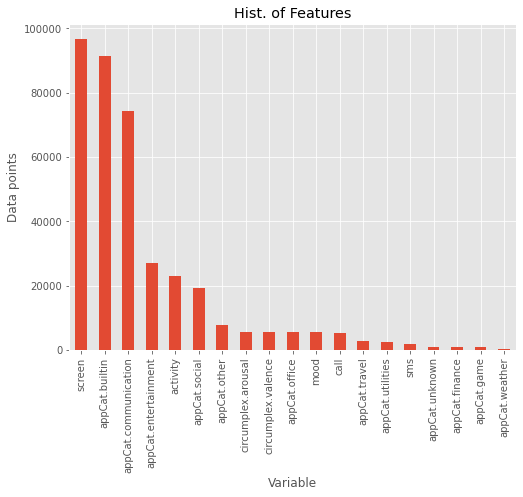

In [5]:
# visualized the dataset by counting variables
hist = pd.DataFrame(dataset.variable.value_counts()).plot(kind='bar', title="Hist. of Features", \
                                                       legend=None, figsize=(8,6))
hist.set_xlabel("Variable")
hist.set_ylabel("Data points")

In [6]:
# label ids
ids = dataset.id.unique()
ids

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

Text(0, 0.5, 'Data points')

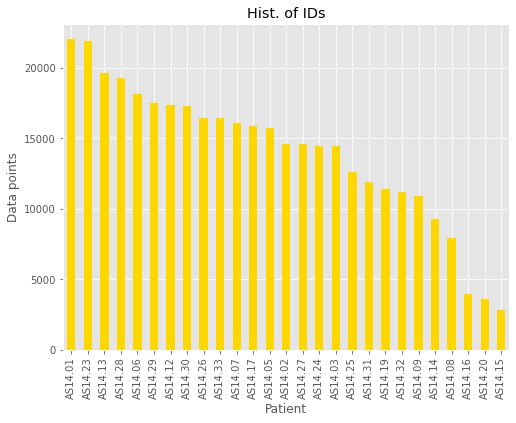

In [7]:
# visualized dataset by counting ids
hist2 = pd.DataFrame(dataset.id.value_counts()).plot(kind="bar", title="Hist. of IDs", \
                                                     legend=None, figsize=(8,6) ,color="gold")
hist2.set_xlabel("Patient")
hist2.set_ylabel("Data points")

In [8]:
# label time
dataset["time"] = pd.to_datetime(dataset["time"])
dataset["time"] = dataset["time"].dt.normalize()
dataset.time

0        2014-02-26
1        2014-02-26
2        2014-02-26
3        2014-02-26
4        2014-02-27
            ...    
376907   2014-04-11
376908   2014-04-19
376909   2014-04-26
376910   2014-04-27
376911   2014-04-07
Name: time, Length: 376912, dtype: datetime64[ns]

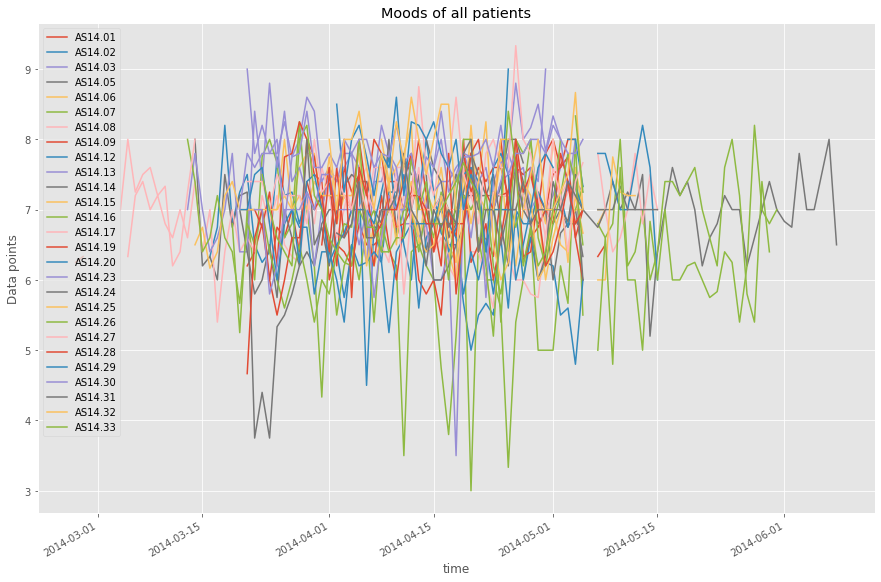

In [9]:
# create an empty dataset which is labeled by ID and time
prodataset = dataset.pivot_table(index=["id","time"], columns="variable",values="value")
# visualized moods of all patients over the time
plt.rcParams["figure.figsize"] = [15,10]
for patient in prodataset.index.levels[0]:
    prodataset.loc[patient]['mood'].plot(label=patient, title="Moods of all patients", ylabel="Data points")
plt.legend();

array([<AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>], dtype=object)

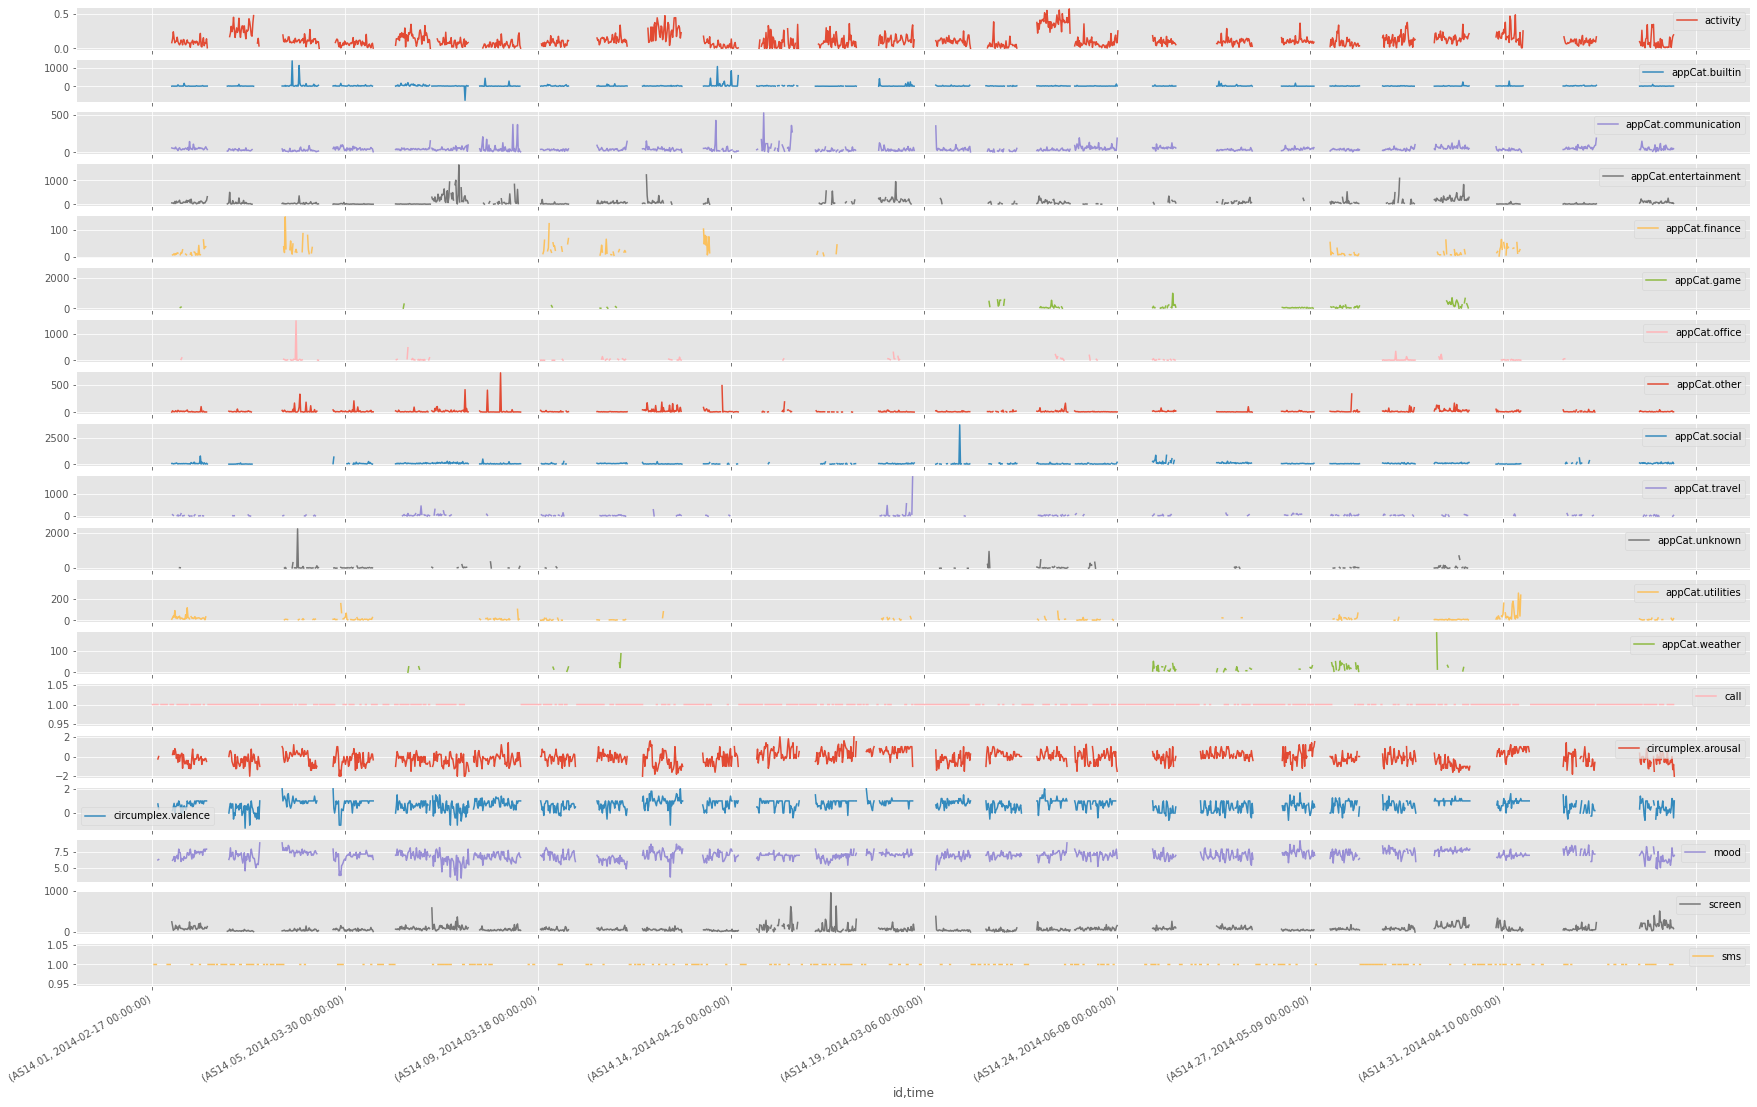

In [10]:
prodataset.plot(subplots=True, figsize=(30,20))

In [11]:
prodataset.reset_index(level=0, inplace=True)
prodataset

variable         id  activity  appCat.builtin  appCat.communication  \
time                                                                  
2014-02-17  AS14.01       NaN             NaN                   NaN   
2014-02-18  AS14.01       NaN             NaN                   NaN   
2014-02-19  AS14.01       NaN             NaN                   NaN   
2014-02-20  AS14.01       NaN             NaN                   NaN   
2014-02-21  AS14.01       NaN             NaN                   NaN   
...             ...       ...             ...                   ...   
2014-05-27  AS14.33  0.012704        8.545776             59.382943   
2014-05-28  AS14.33  0.103301        9.590398             37.238750   
2014-05-29  AS14.33  0.169354        6.452161             54.388125   
2014-05-30  AS14.33  0.192901       14.776845             46.412278   
2014-05-31  AS14.33       NaN             NaN                   NaN   

variable    appCat.entertainment  appCat.finance  appCat.game  appCat.office  \
time                                                                           
2014-02-17                   NaN             NaN          NaN            NaN   
2014-02-18                   NaN             NaN          NaN            NaN   
2014-02-19                   NaN             NaN          NaN            NaN   
2014-02-20                   NaN             NaN          NaN            NaN   
2014-02-21                   NaN             NaN          NaN            NaN   
...                          ...             ...          ...            ...   
2014-05-27             62.347000             NaN          NaN            NaN   
2014-05-28             43.907571             NaN          NaN      44.738625   
2014-05-29             68.369000             NaN          NaN            NaN   
2014-05-30             37.174286             NaN          NaN            NaN   
2014-05-31                   NaN             NaN          NaN            NaN   

variable    appCat.other  appCat.social  appCat.travel  appCat.unknown  \
time                                                                     
2014-02-17           NaN            NaN            NaN             NaN   
2014-02-18           NaN            NaN            NaN             NaN   
2014-02-19           NaN            NaN            NaN             NaN   
2014-02-20           NaN            NaN            NaN             NaN   
2014-02-21           NaN            NaN            NaN             NaN   
...                  ...            ...            ...             ...   
2014-05-27     17.835750      50.259100            NaN             NaN   
2014-05-28     27.891895      99.281685            NaN             NaN   
2014-05-29      9.734000     198.880222       0.939000             NaN   
2014-05-30     10.522000      75.390690      37.594571        2.690667   
2014-05-31           NaN            NaN            NaN             NaN   

variable    appCat.utilities  appCat.weather  call  circumplex.arousal  \
time                                                                     
2014-02-17               NaN             NaN   1.0                 NaN   
2014-02-18               NaN             NaN   1.0                 NaN   
2014-02-19               NaN             NaN   1.0                 NaN   
2014-02-20               NaN             NaN   1.0                 NaN   
2014-02-21               NaN             NaN   NaN                 NaN   
...                      ...             ...   ...                 ...   
2014-05-27         18.724333             NaN   1.0           -0.600000   
2014-05-28          5.111000             NaN   1.0            0.000000   
2014-05-29          1.599500             NaN   1.0           -1.333333   
2014-05-30         15.521667             NaN   1.0           -0.800000   
2014-05-31               NaN             NaN   NaN           -2.000000   

variable    circumplex.valence  mood      screen  sms  
time                                                 

[Text(0.5, 0, 'activity'),
 Text(1.5, 0, 'appCat.builtin'),
 Text(2.5, 0, 'appCat.communication'),
 Text(3.5, 0, 'appCat.entertainment'),
 Text(4.5, 0, 'appCat.finance'),
 Text(5.5, 0, 'appCat.game'),
 Text(6.5, 0, 'appCat.office'),
 Text(7.5, 0, 'appCat.other'),
 Text(8.5, 0, 'appCat.social'),
 Text(9.5, 0, 'appCat.travel'),
 Text(10.5, 0, 'appCat.unknown'),
 Text(11.5, 0, 'appCat.utilities'),
 Text(12.5, 0, 'appCat.weather'),
 Text(13.5, 0, 'call'),
 Text(14.5, 0, 'circumplex.arousal'),
 Text(15.5, 0, 'circumplex.valence'),
 Text(16.5, 0, 'mood'),
 Text(17.5, 0, 'screen'),
 Text(18.5, 0, 'sms')]

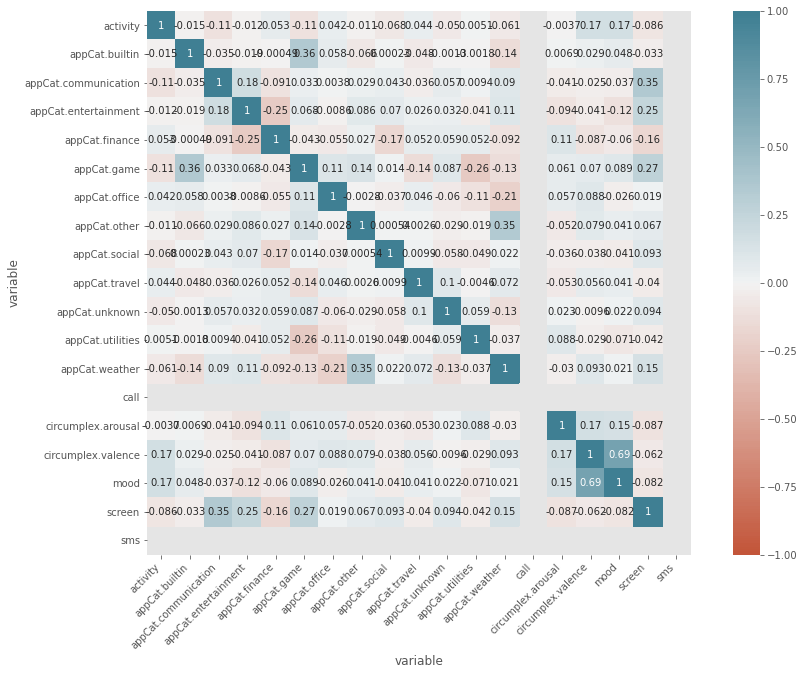

In [12]:
corr = prodataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [13]:
groupdataset = prodataset.groupby(["id"])
groupdataset.get_group("AS14.30")

variable         id  activity  appCat.builtin  appCat.communication  \
time                                                                  
2014-02-17  AS14.30       NaN             NaN                   NaN   
2014-02-18  AS14.30       NaN             NaN                   NaN   
2014-02-20  AS14.30       NaN             NaN                   NaN   
2014-02-21  AS14.30       NaN             NaN                   NaN   
2014-02-22  AS14.30       NaN             NaN                   NaN   
...             ...       ...             ...                   ...   
2014-05-01  AS14.30  0.163100       17.218200             50.695860   
2014-05-02  AS14.30  0.135877        8.758336             67.204286   
2014-05-03  AS14.30  0.181973        6.621164             39.083111   
2014-05-04  AS14.30  0.209722       20.548970             51.779000   
2014-05-05  AS14.30       NaN             NaN                   NaN   

variable    appCat.entertainment  appCat.finance  appCat.game  appCat.office  \
time                                                                           
2014-02-17                   NaN             NaN          NaN            NaN   
2014-02-18                   NaN             NaN          NaN            NaN   
2014-02-20                   NaN             NaN          NaN            NaN   
2014-02-21                   NaN             NaN          NaN            NaN   
2014-02-22                   NaN             NaN          NaN            NaN   
...                          ...             ...          ...            ...   
2014-05-01            158.954526             NaN     298.7185            NaN   
2014-05-02            253.065179       14.666778     178.1180            NaN   
2014-05-03            184.414400             NaN      26.1890            NaN   
2014-05-04            294.078429             NaN          NaN            NaN   
2014-05-05                   NaN             NaN          NaN            NaN   

variable    appCat.other  appCat.social  appCat.travel  appCat.unknown  \
time                                                                     
2014-02-17           NaN            NaN            NaN             NaN   
2014-02-18           NaN            NaN            NaN             NaN   
2014-02-20           NaN            NaN            NaN             NaN   
2014-02-21           NaN            NaN            NaN             NaN   
2014-02-22           NaN            NaN            NaN             NaN   
...                  ...            ...            ...             ...   
2014-05-01     47.864435      87.084278      29.956875          36.500   
2014-05-02     10.040143      57.932133      34.374600          11.042   
2014-05-03      9.529111     163.699143            NaN             NaN   
2014-05-04     36.819556     167.541833            NaN             NaN   
2014-05-05           NaN            NaN            NaN             NaN   

variable    appCat.utilities  appCat.weather  call  circumplex.arousal  \
time                                                                     
2014-02-17               NaN             NaN   1.0                 NaN   
2014-02-18               NaN             NaN   1.0                 NaN   
2014-02-20               NaN             NaN   1.0                 NaN   
2014-02-21               NaN             NaN   1.0                 NaN   
2014-02-22               NaN             NaN   1.0                 NaN   
...                      ...             ...   ...                 ...   
2014-05-01          6.798571             NaN   1.0                -1.0   
2014-05-02         10.333167             NaN   1.0                -1.0   
2014-05-03          4.516500             NaN   1.0                -1.2   
2014-05-04               NaN             NaN   NaN                -1.4   
2014-05-05               NaN             NaN   NaN                -1.0   

variable    circumplex.valence  mood      screen  sms  
time                                                 

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

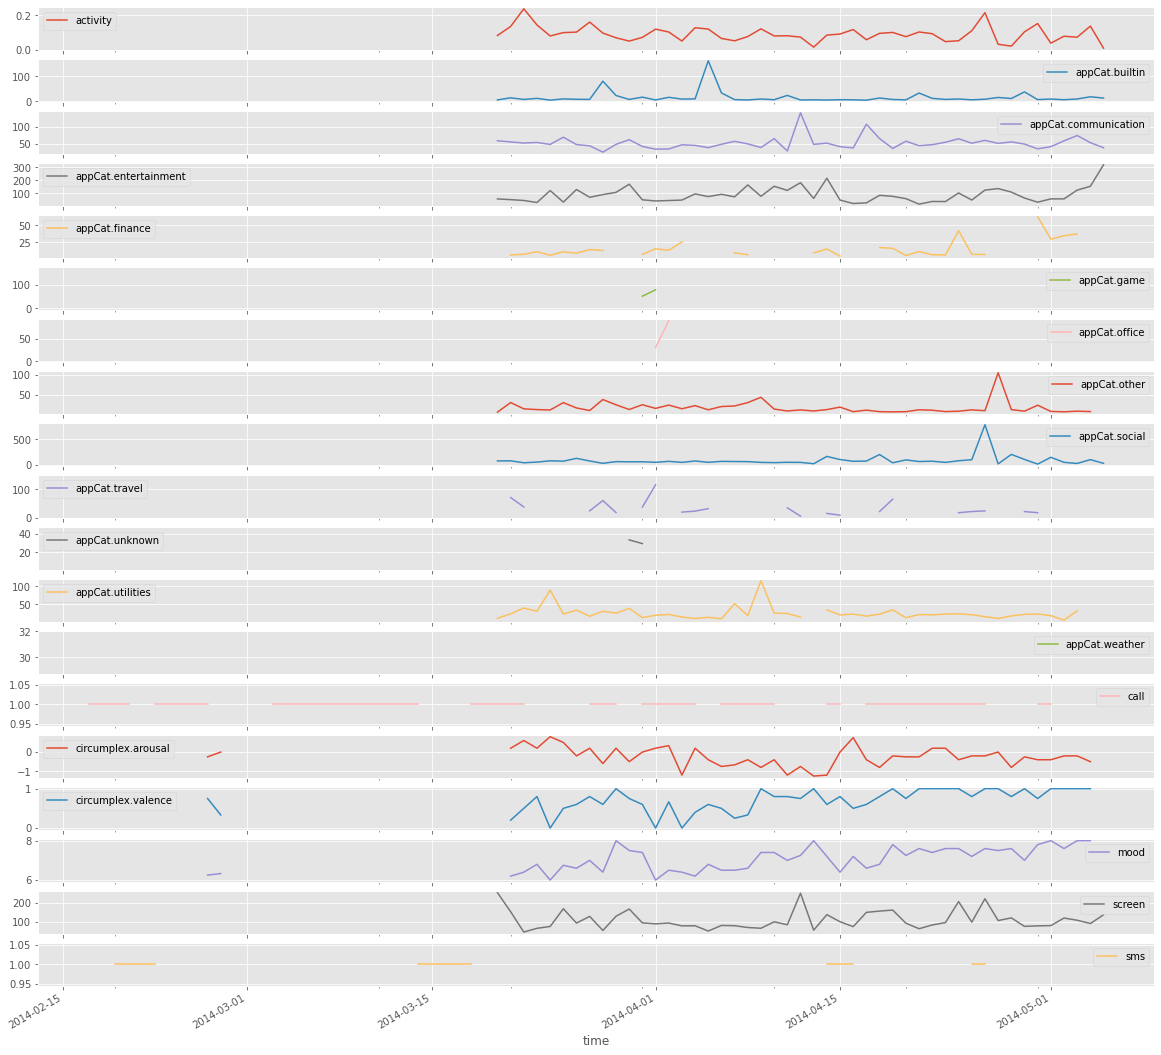

In [14]:
groupdataset.get_group("AS14.01").plot(subplots=True, figsize=(20, 20))

## Preprocessing

In [15]:
attrs = dataset.variable.unique()
def check_missing_data(data, passp=30):
    lstmisattrs = list()
    misvalues = data.isna().sum() * 100 / len(data)

    for attr in attrs:
        if misvalues[attr] > passp:
            lstmisattrs.append(attr)
            
    return lstmisattrs

In [16]:
def freq_miss_attr(ditmisattrs: dict, lstmisattrs: list):
    for attr in lstmisattrs:
        if attr not in ditmisattrs:
            ditmisattrs[attr] = 1
        else:
            ditmisattrs[attr] += 1

In [17]:
def cut_outliers(data, cutvalue = 10):
    data["cut"] = resampledata.isnull().sum(axis=1) > cutvalue
    data.drop(data[data.cut].index, inplace=True)

In [18]:
ditfreqmisattr = dict()
lstmisattrid = list()
cleanedata = dict()

for id in ids:
    resampledata = groupdataset.get_group(id).resample("D").mean()
    
    resampledata["call"] = resampledata["call"].fillna(0)
    resampledata["sms"] = resampledata["sms"].fillna(0)
    
    resampledata.dropna(subset=["mood"], inplace=True)
    
    lstmisattr = check_missing_data(resampledata)
    lstmisattrid.append((id, lstmisattr))
    freq_miss_attr(ditfreqmisattr, lstmisattr)
    
    cut_outliers(resampledata)
    
    cleanedata[id] = resampledata

In [19]:
ditfreqmisattr

{'appCat.finance': 27,
 'appCat.game': 24,
 'appCat.office': 26,
 'appCat.travel': 26,
 'appCat.unknown': 25,
 'appCat.weather': 27,
 'appCat.utilities': 24,
 'appCat.social': 11,
 'appCat.entertainment': 13,
 'appCat.communication': 3,
 'appCat.other': 4,
 'activity': 1,
 'screen': 1,
 'appCat.builtin': 1}

In [20]:
def del_key(ditfreq):
    lstdelkeys = list()
    
    for key in ditfreq:
        if ditfreq[key] == 1:
            lstdelkeys.append(key)
    for keydel in lstdelkeys:
        del ditfreq[keydel]
    return ditfreq

In [21]:
ditfreqmisattr = del_key(ditfreqmisattr)
ditfreqmisattr

{'appCat.finance': 27,
 'appCat.game': 24,
 'appCat.office': 26,
 'appCat.travel': 26,
 'appCat.unknown': 25,
 'appCat.weather': 27,
 'appCat.utilities': 24,
 'appCat.social': 11,
 'appCat.entertainment': 13,
 'appCat.communication': 3,
 'appCat.other': 4}

In [22]:
del cleanedata["AS14.26"]
cleanedata

{'AS14.01': variable    activity  appCat.builtin  appCat.communication  \
 time                                                         
 2014-03-21  0.134050       14.269173             55.095526   
 2014-03-22  0.236880        7.781160             51.697063   
 2014-03-23  0.142741       12.134396             53.442031   
 2014-03-24  0.078961        4.982506             47.541687   
 2014-03-25  0.098374       10.026874             69.437507   
 2014-03-26  0.101308        8.460123             47.061534   
 2014-03-27  0.159511        7.982643             43.353200   
 2014-03-28  0.095698       81.149960             24.078694   
 2014-03-29  0.068203       23.525663             47.731439   
 2014-03-30  0.049093        7.818208             61.833571   
 2014-03-31  0.070505       17.019569             41.338271   
 2014-04-01  0.118443        5.749033             33.127859   
 2014-04-02  0.101917       16.428859             33.756859   
 2014-04-03  0.049238        9.175747       

In [23]:
for index in cleanedata:
    cleanedata[index].drop(columns=ditfreqmisattr.keys(), inplace=True)
    cleanedata[index].fillna(cleanedata[index].mean(), inplace=True)

C:\Users\Helia\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


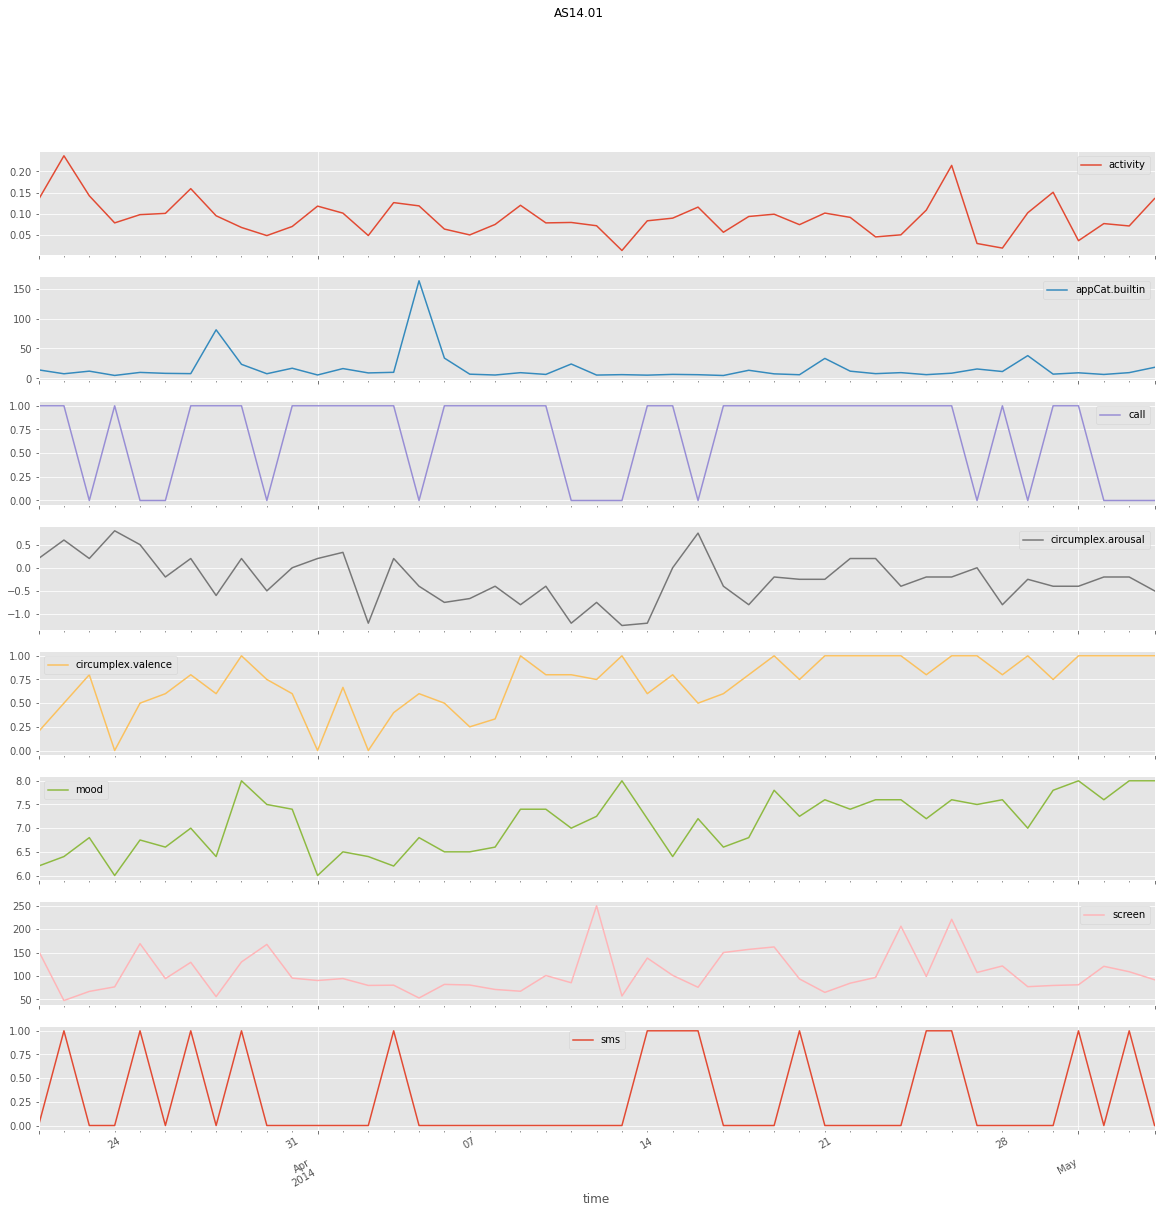

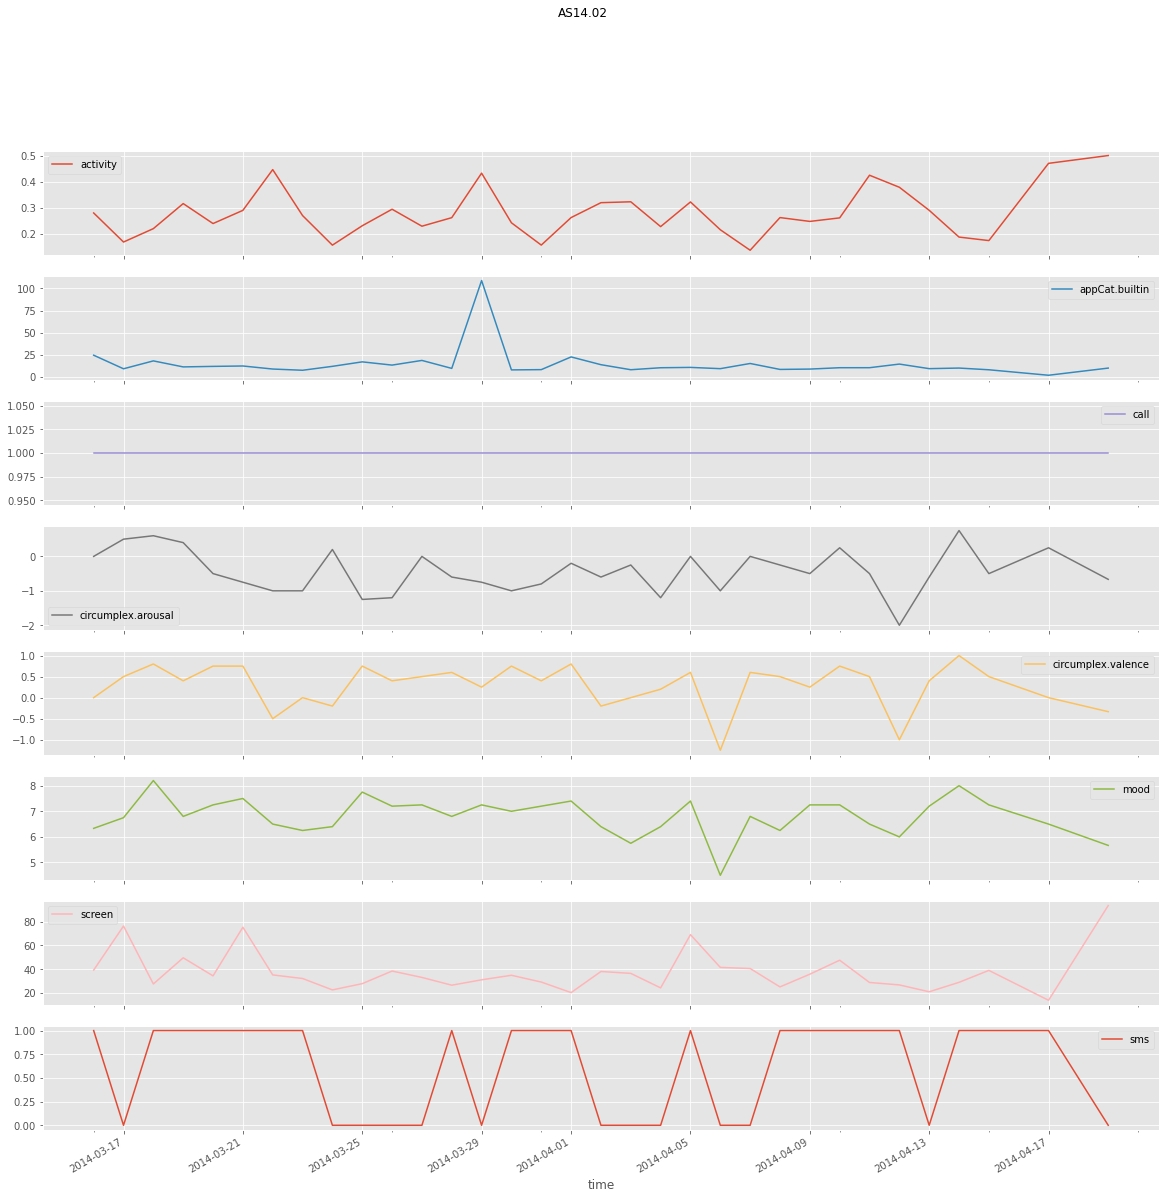

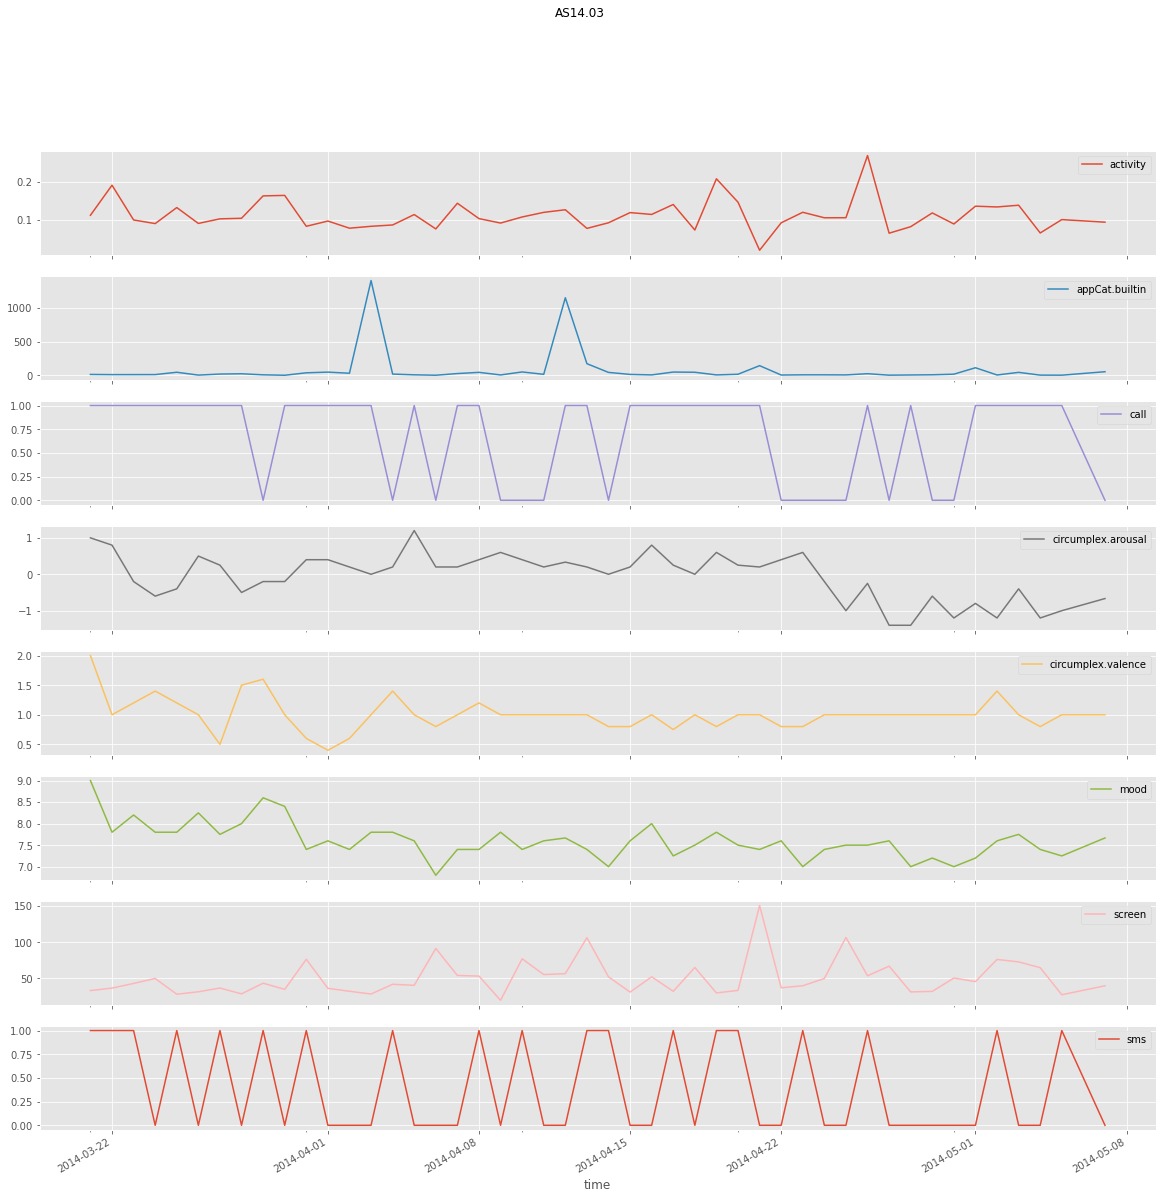

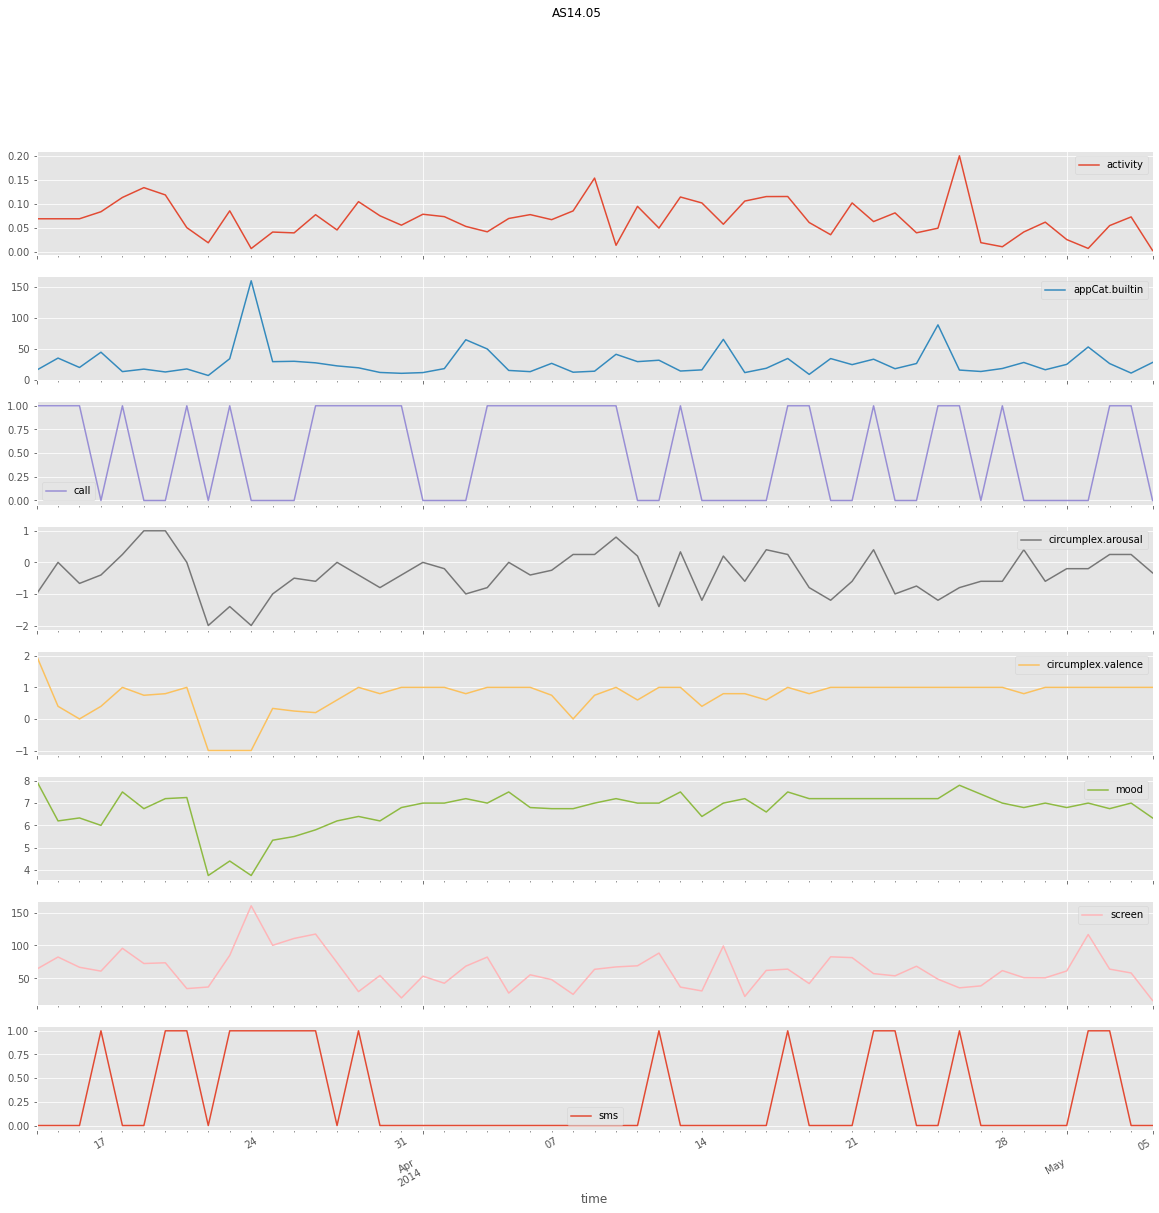

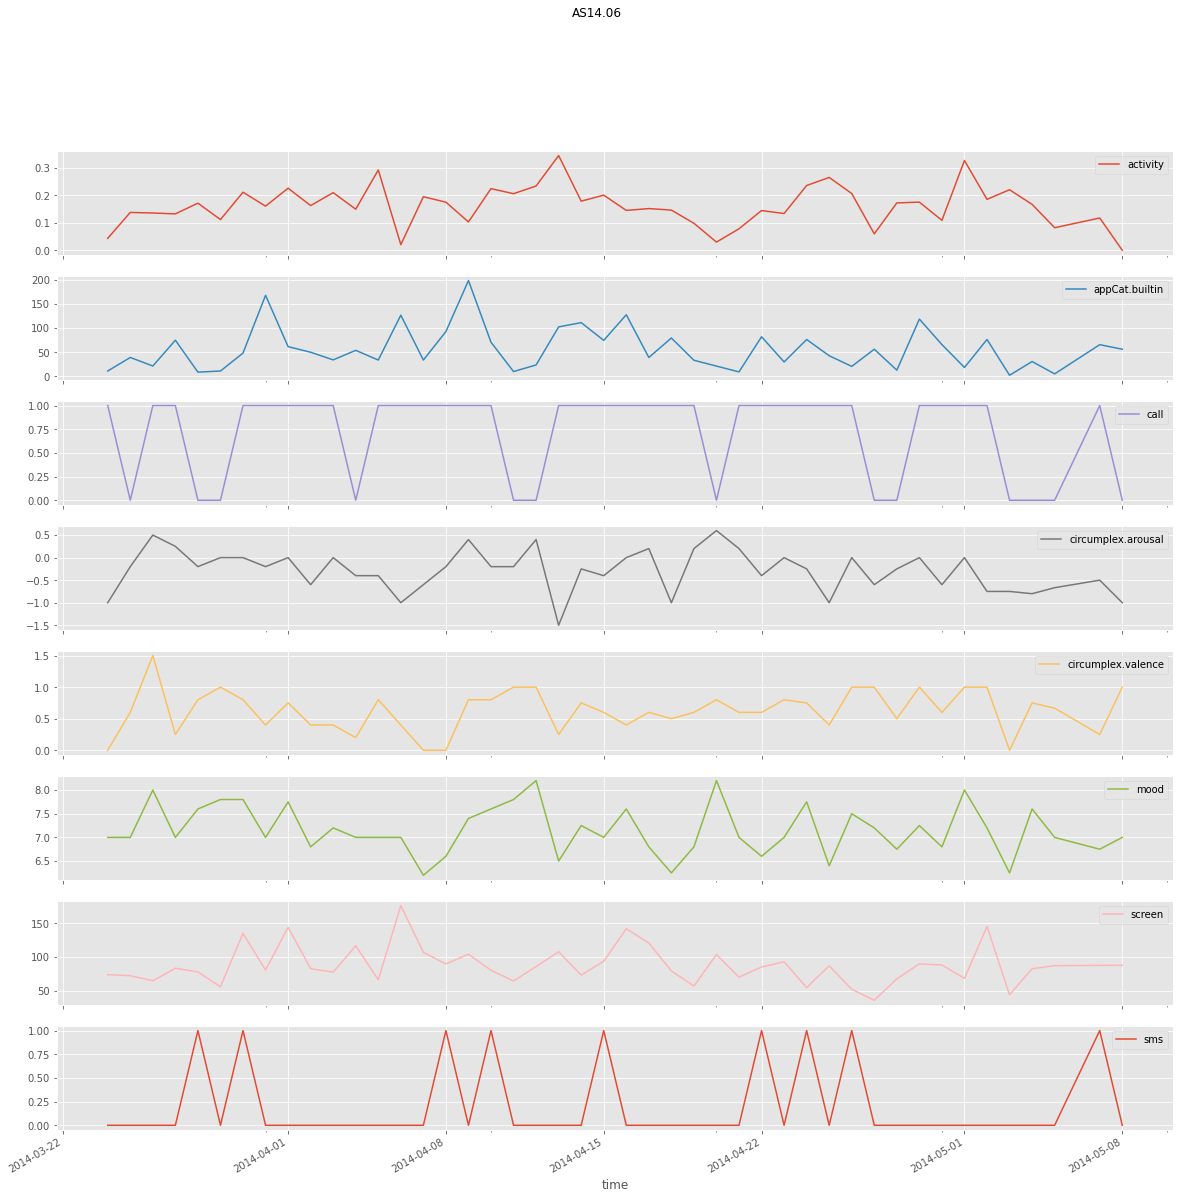

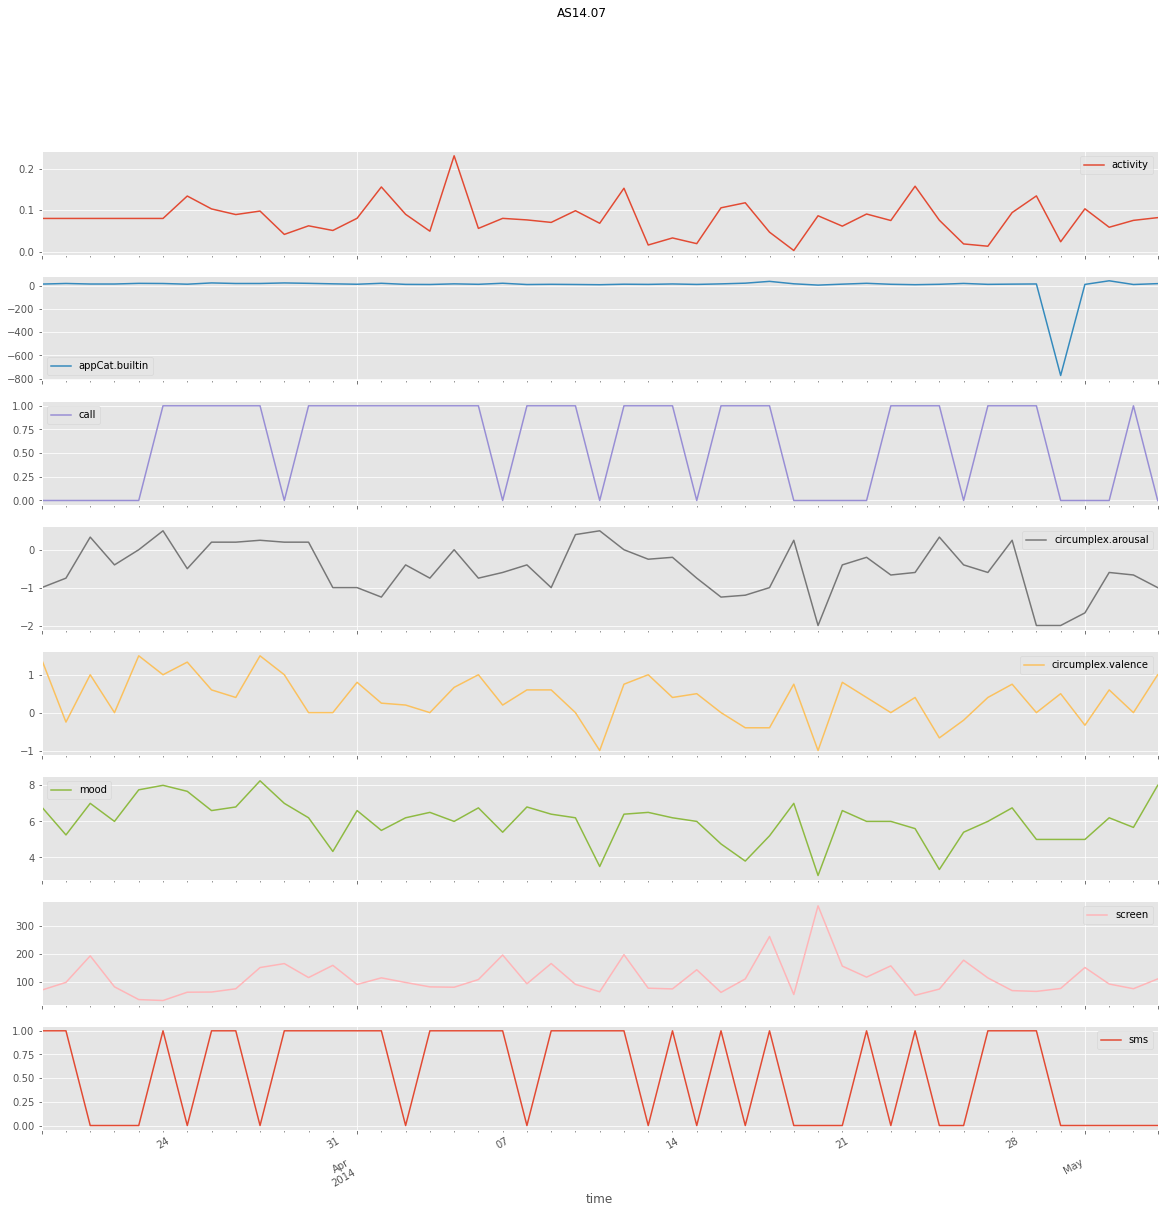

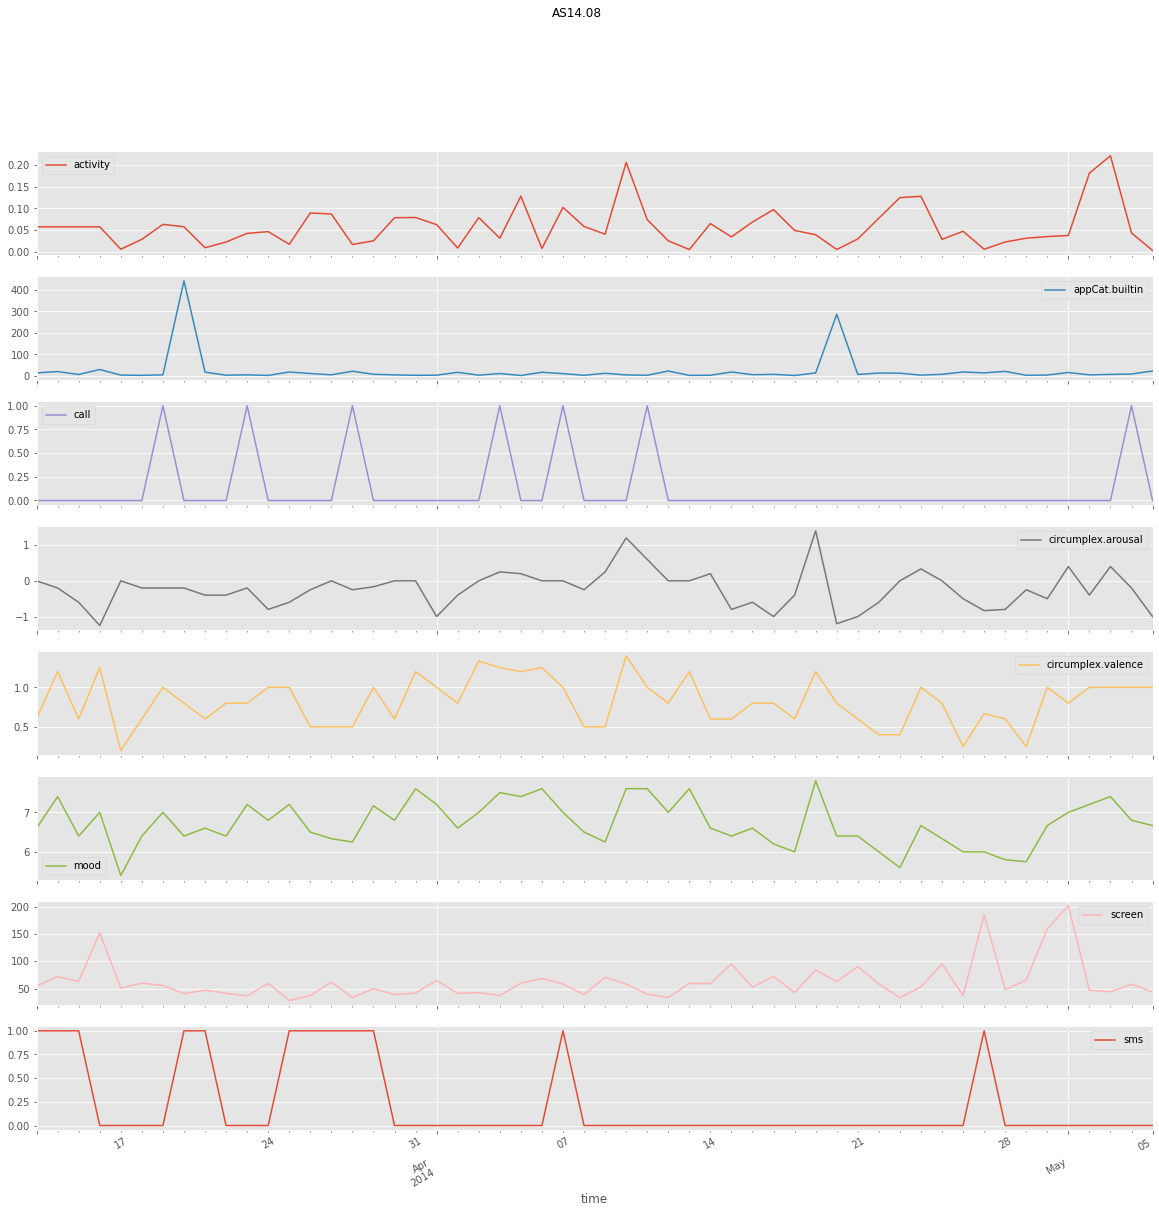

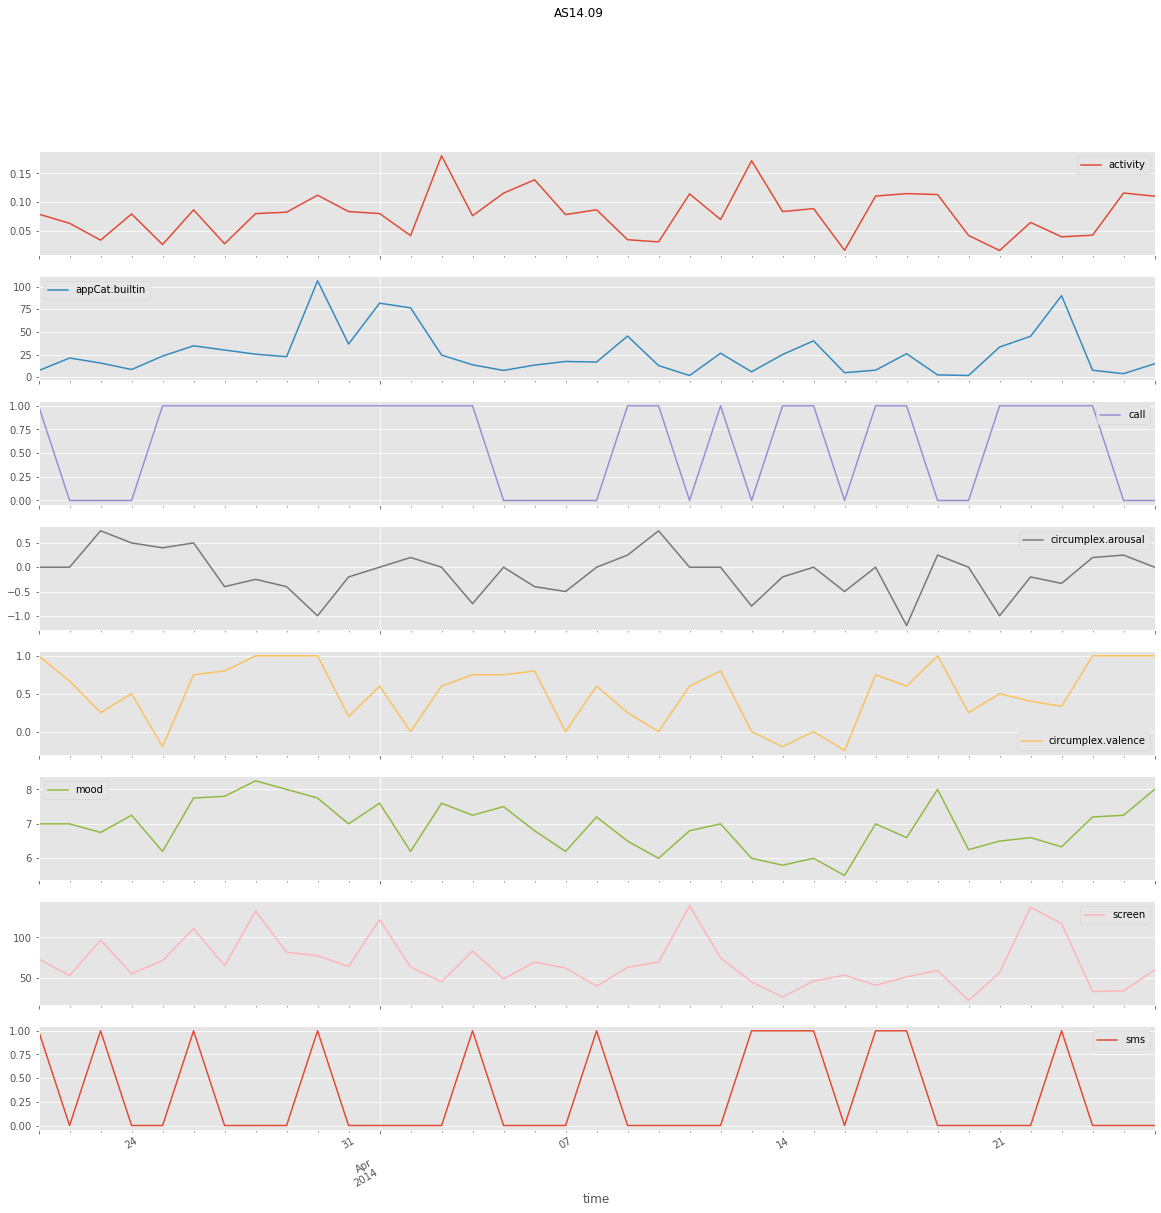

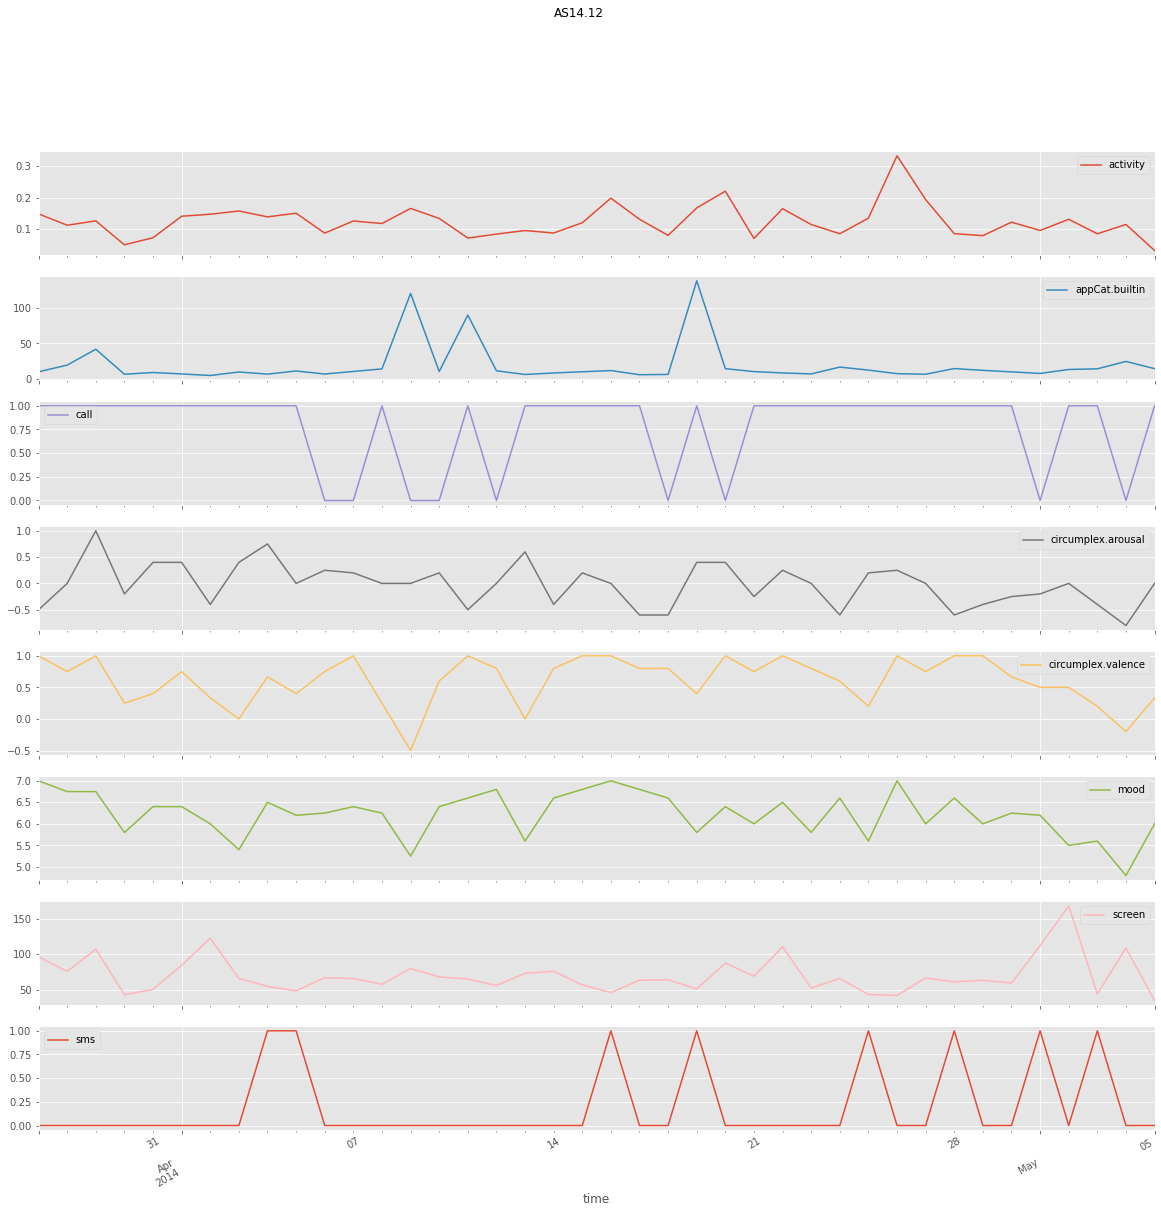

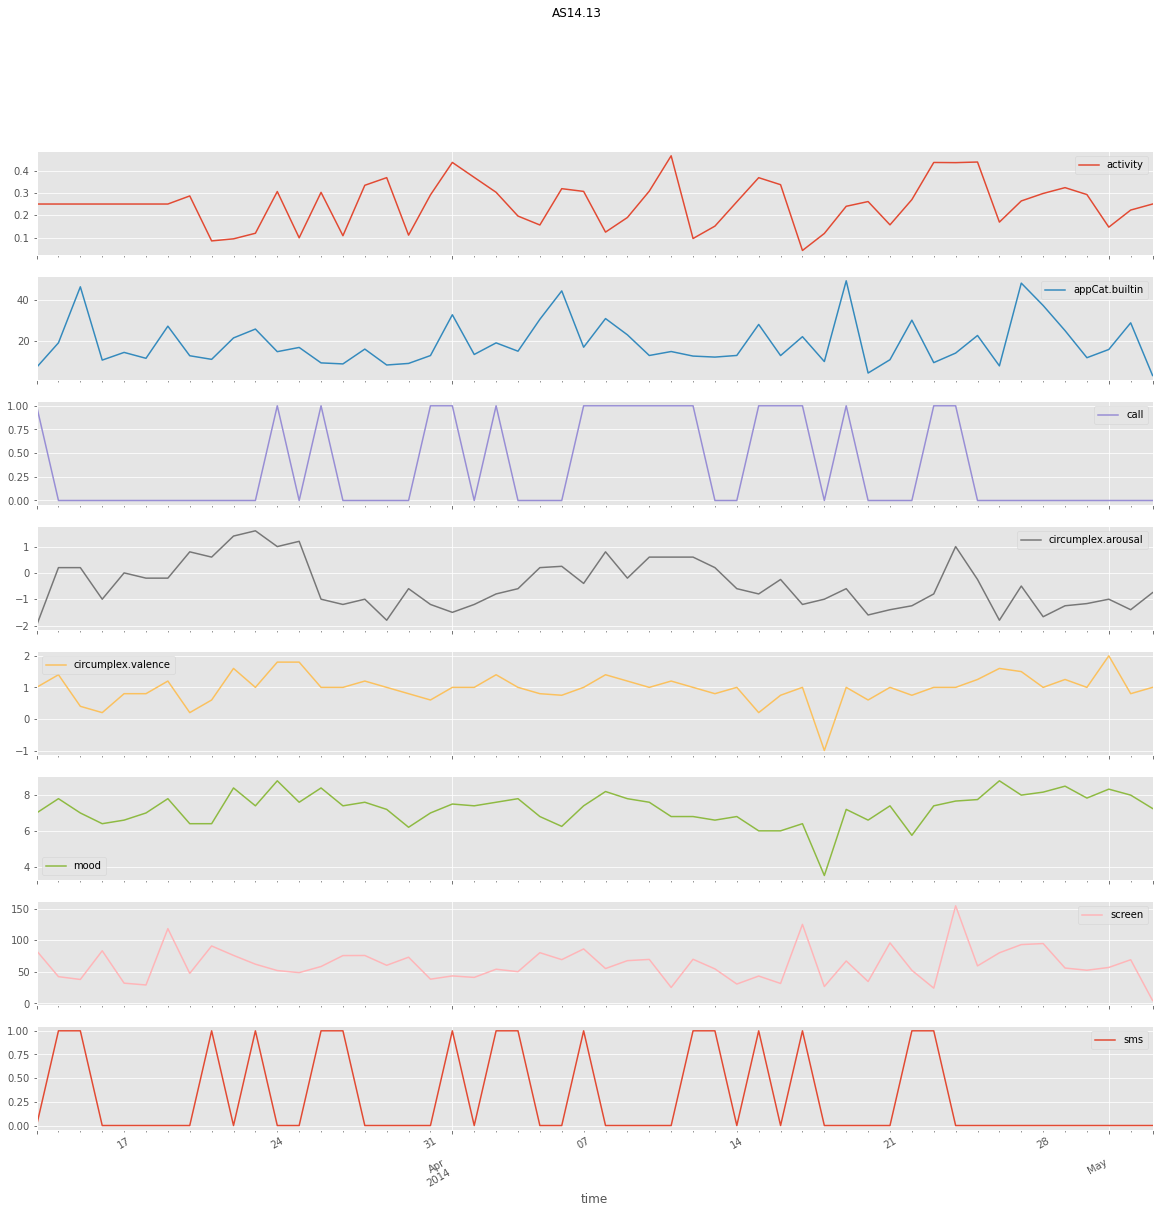

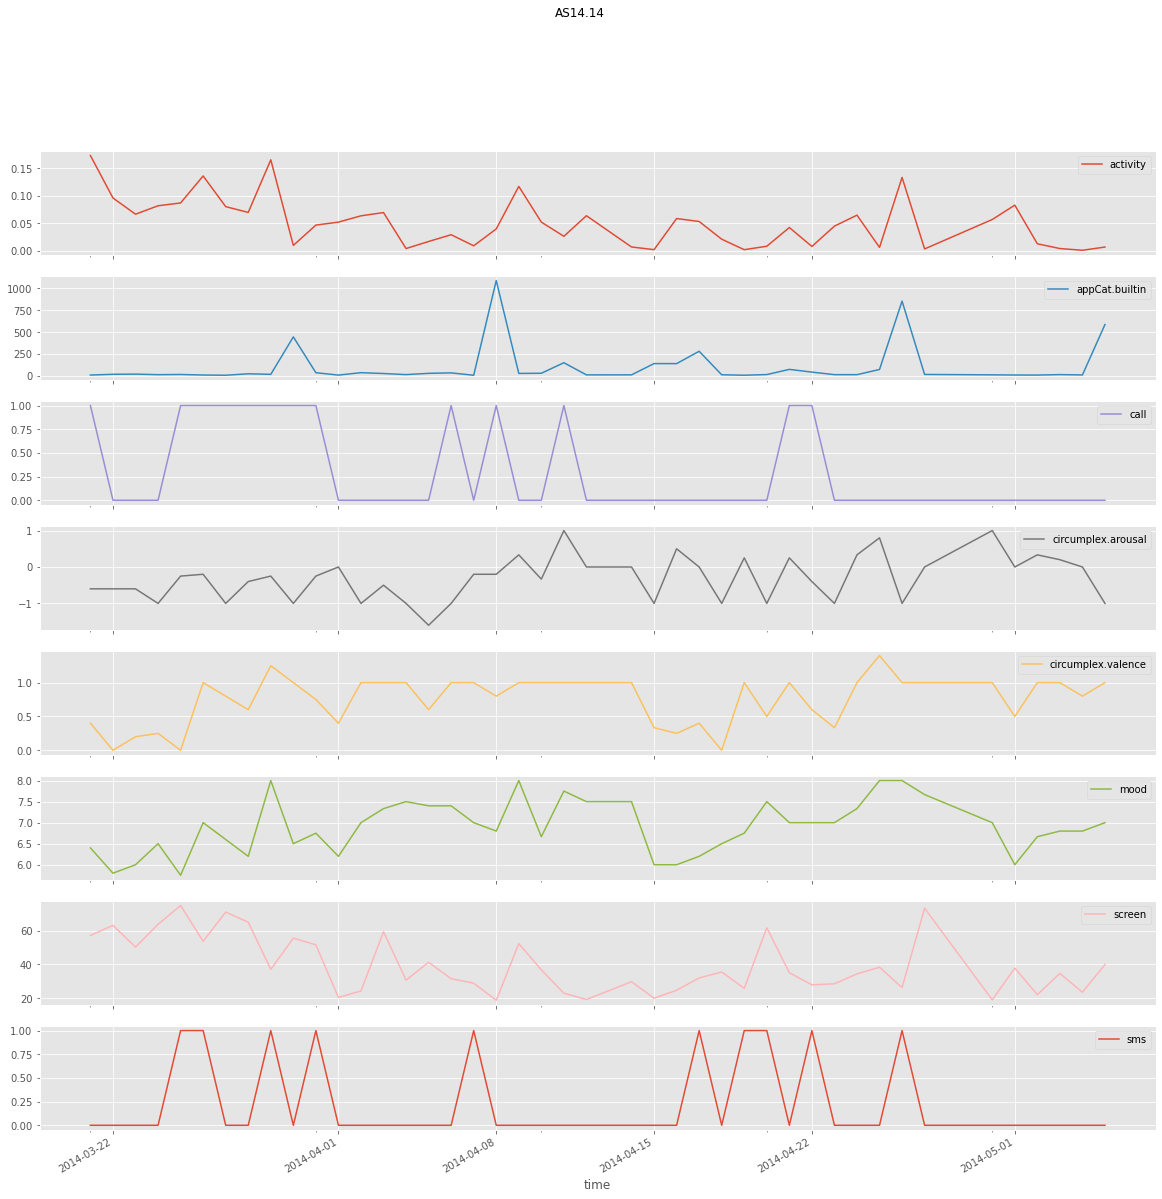

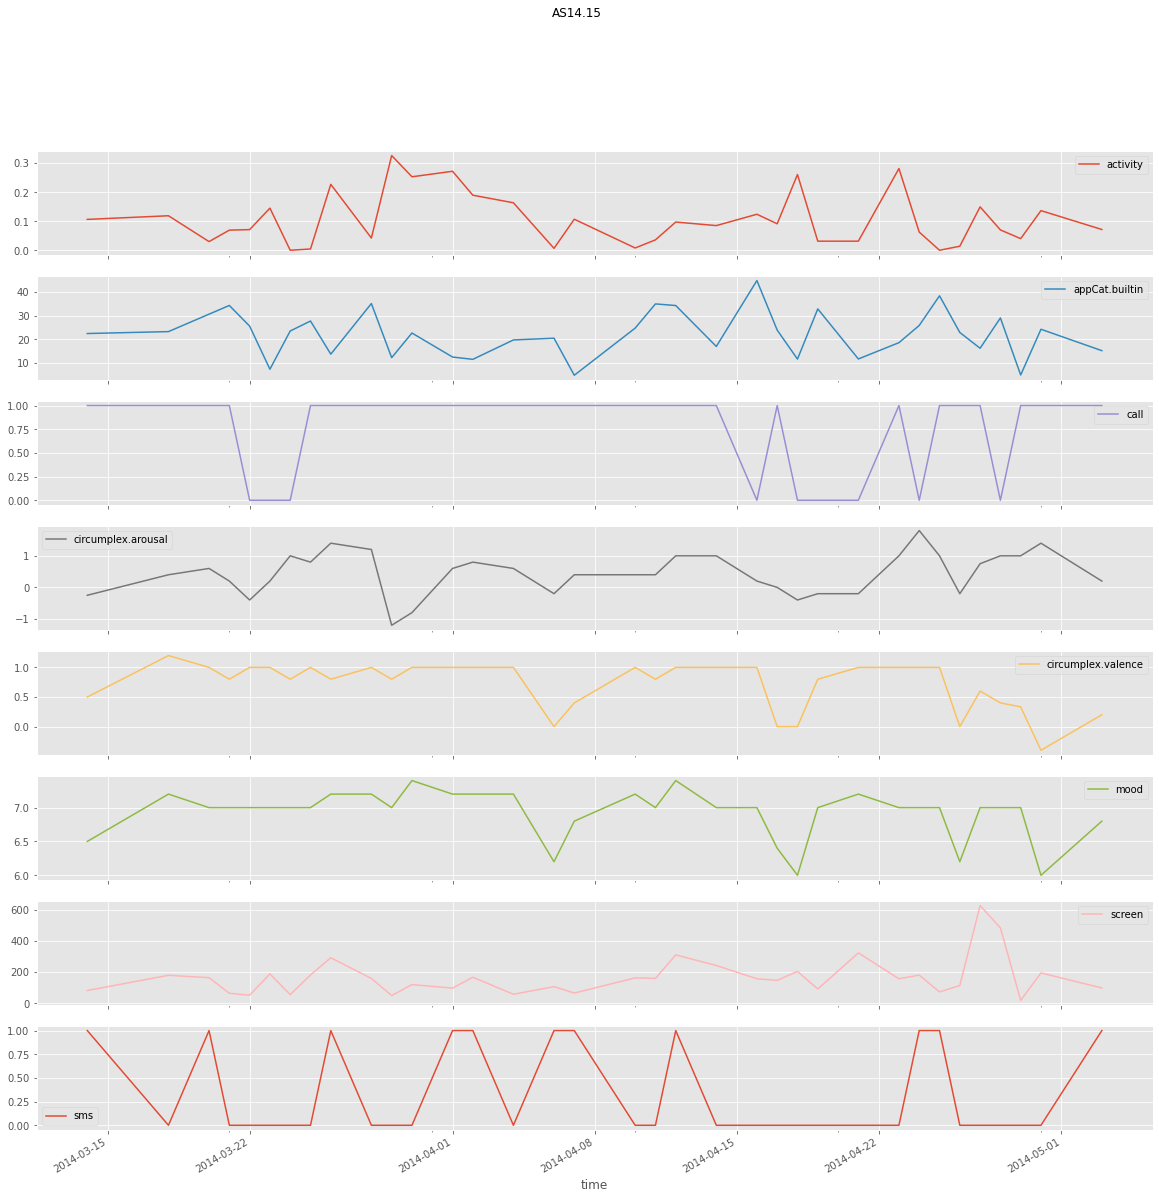

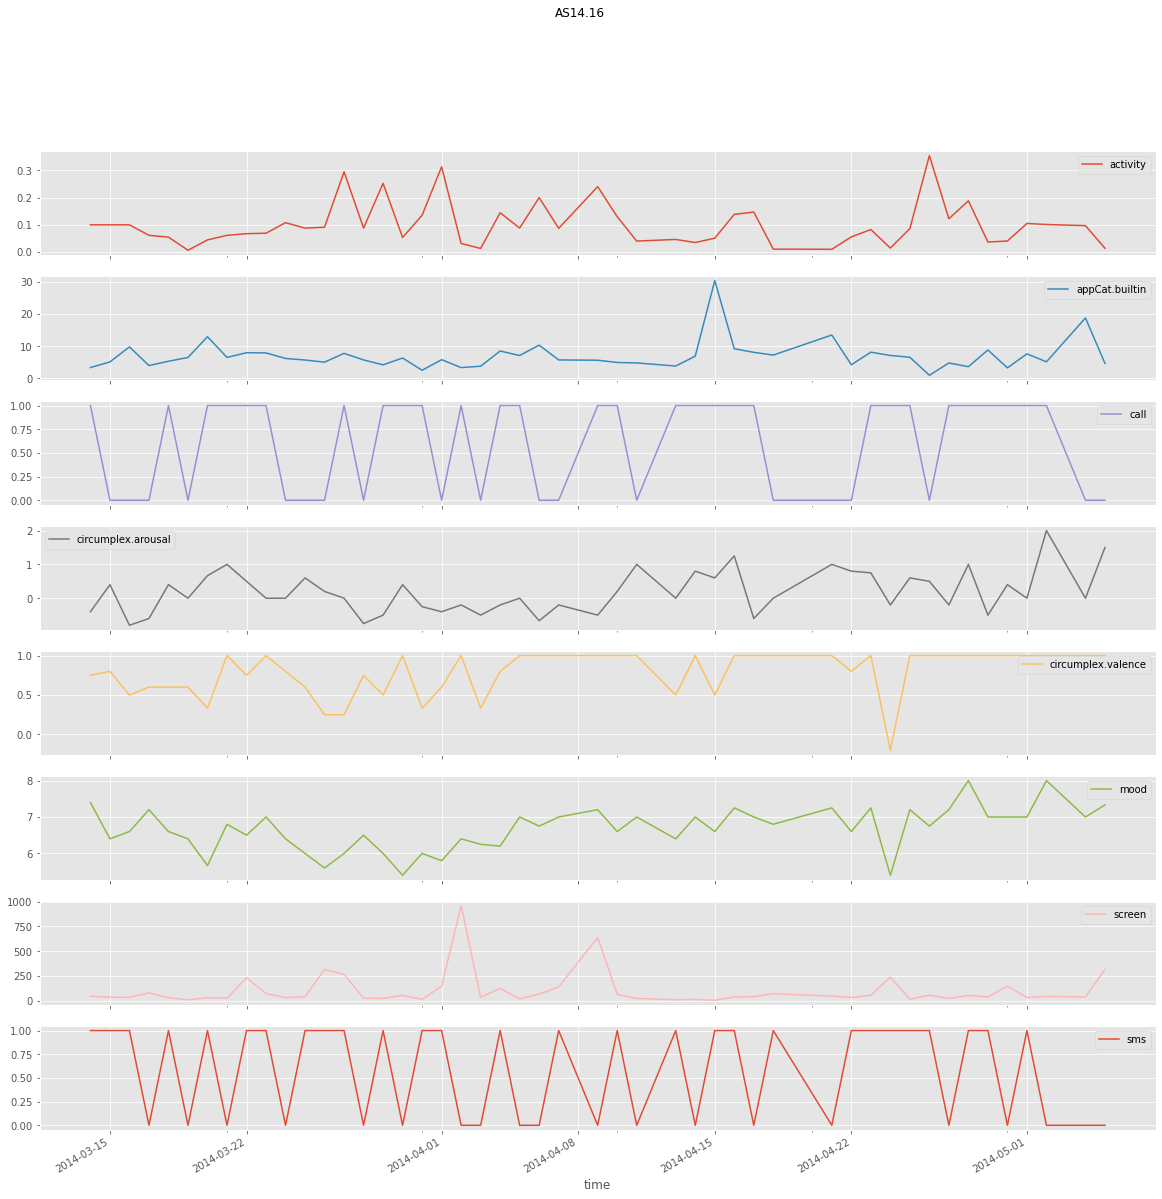

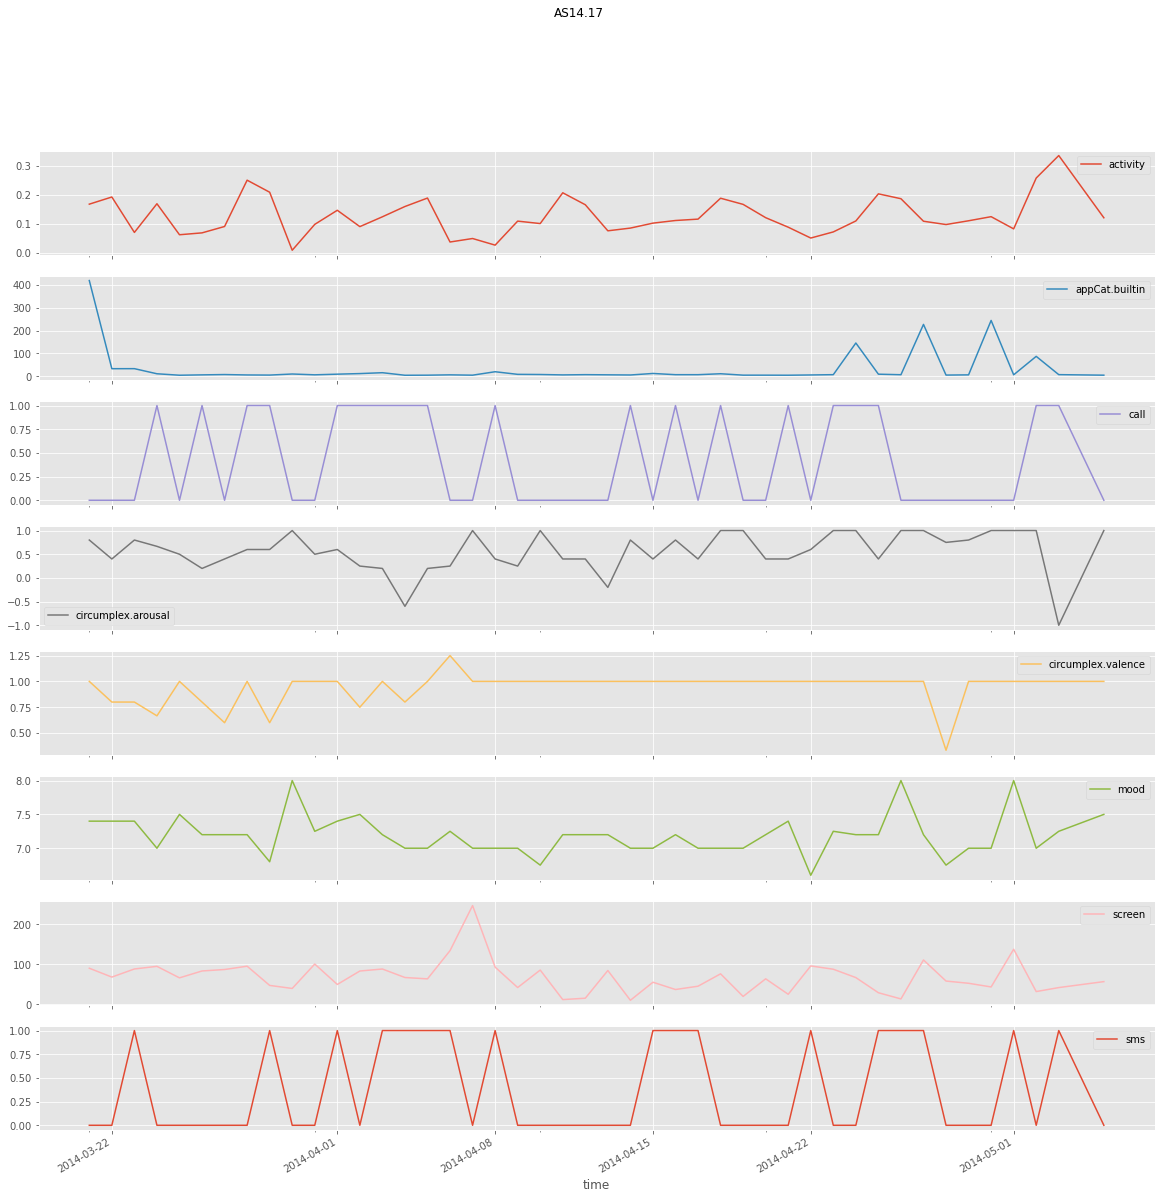

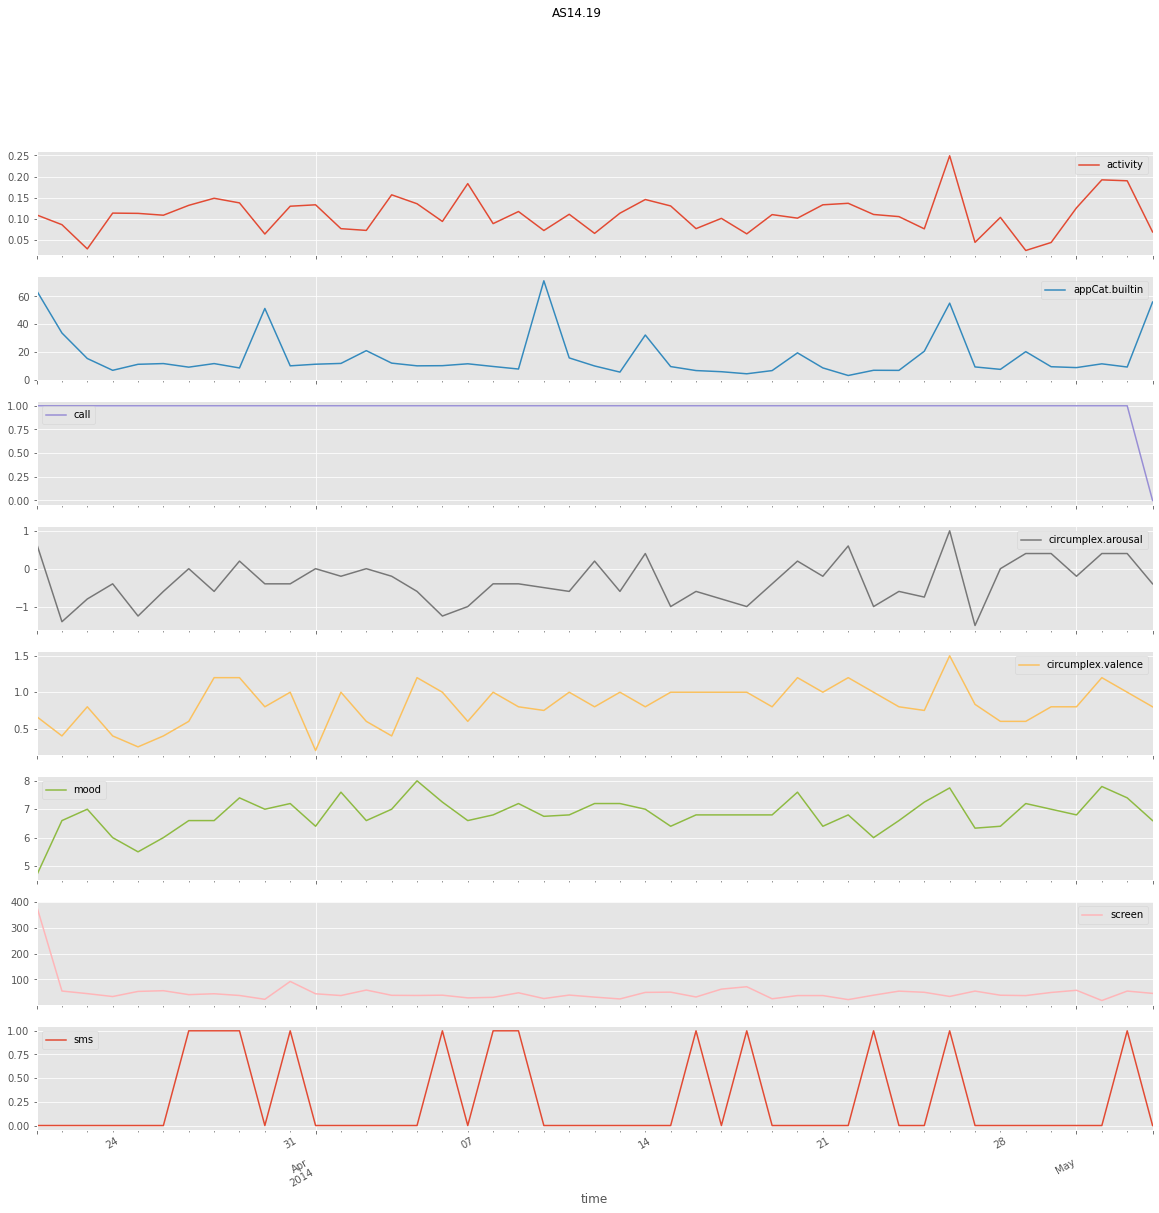

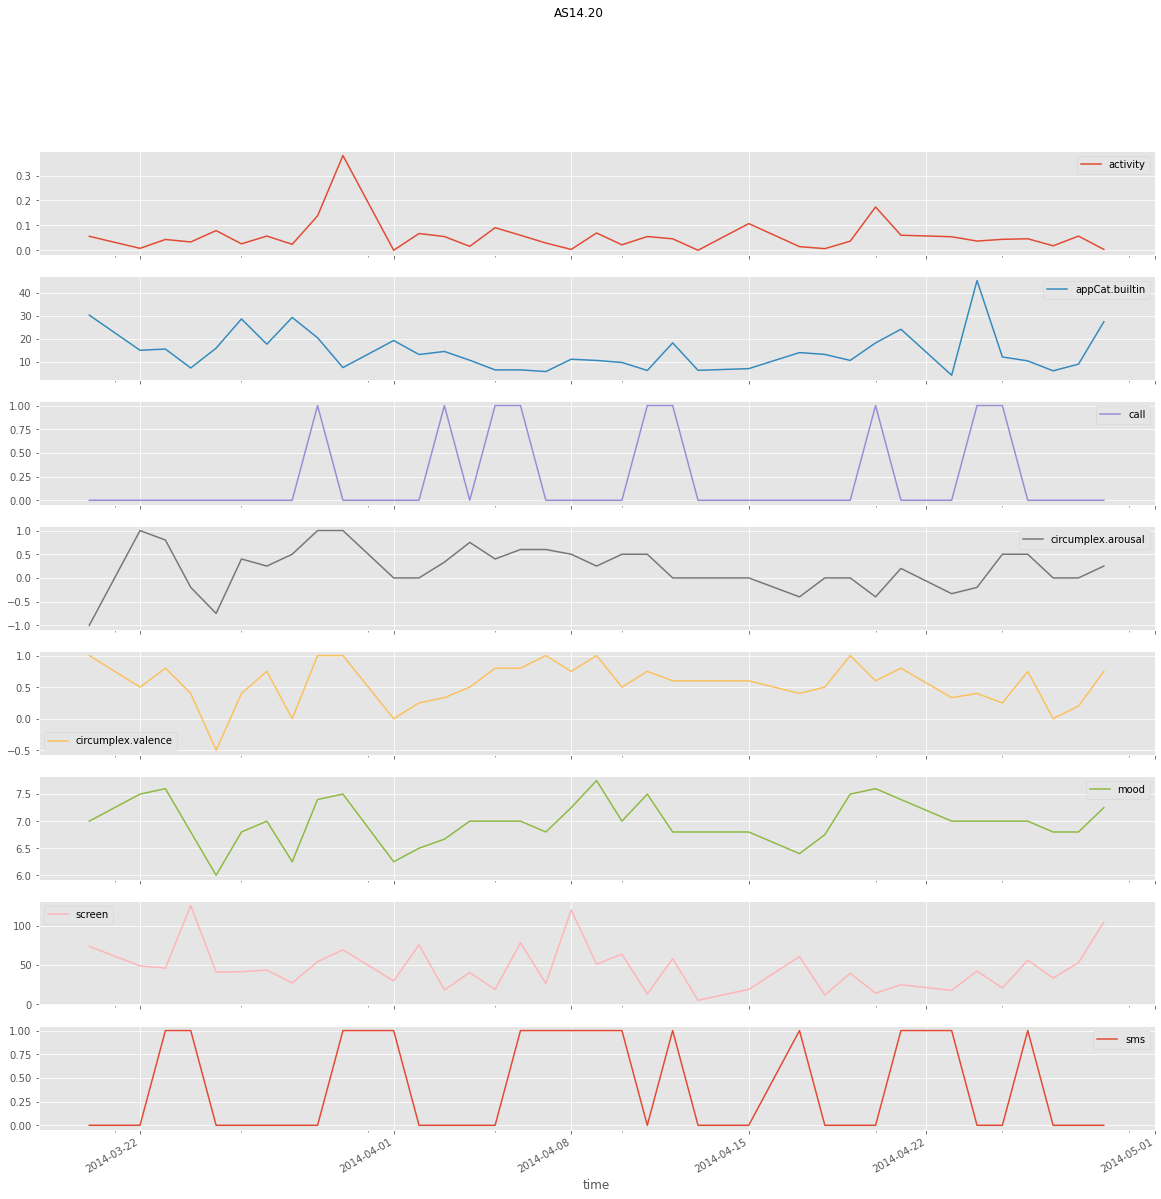

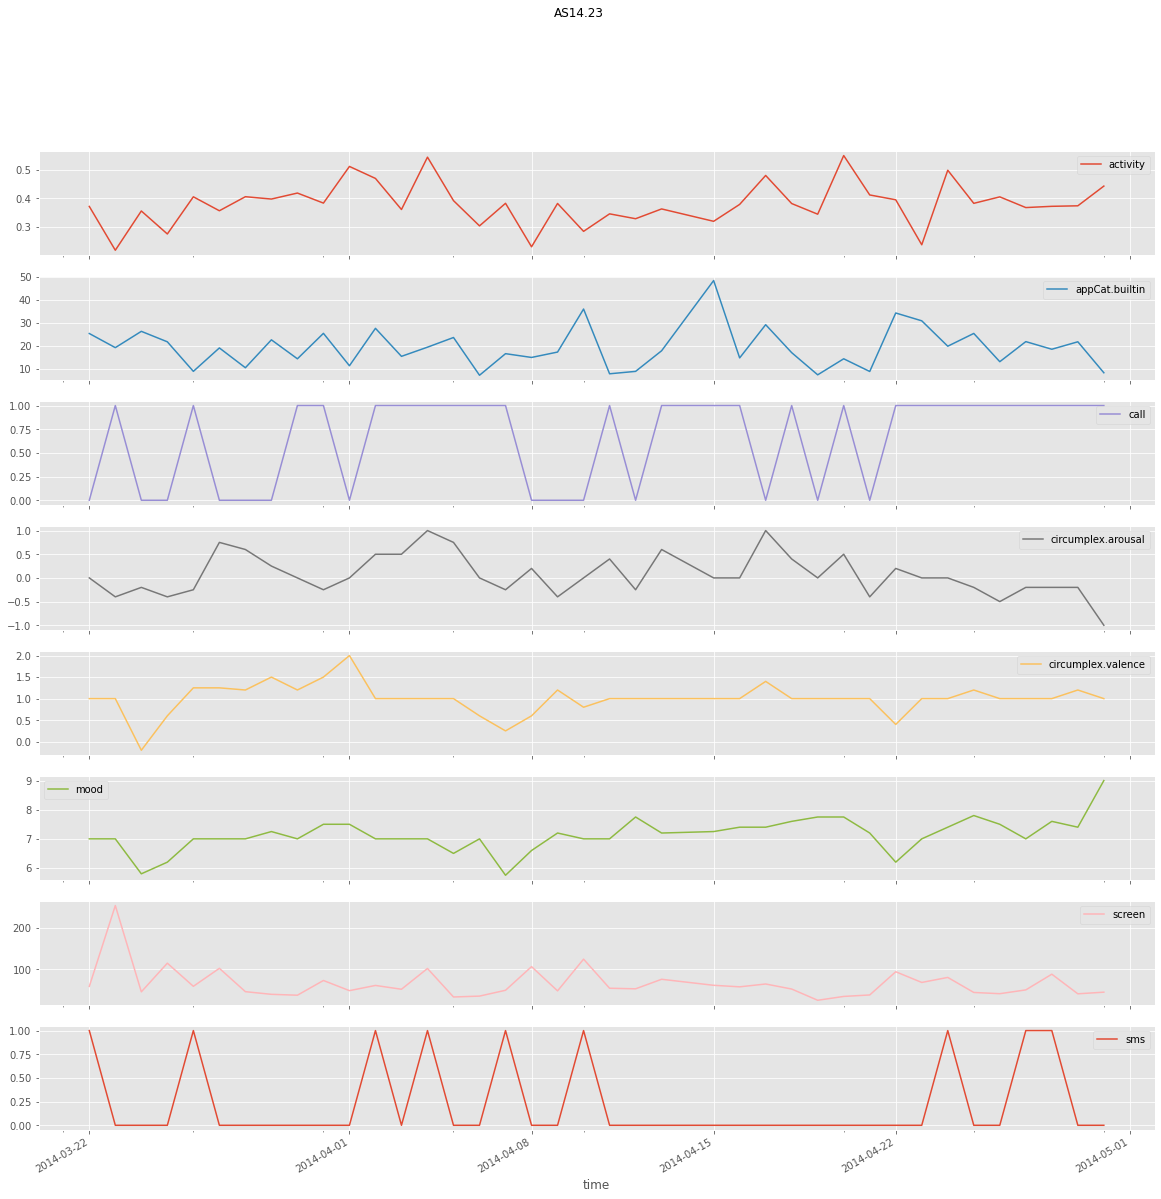

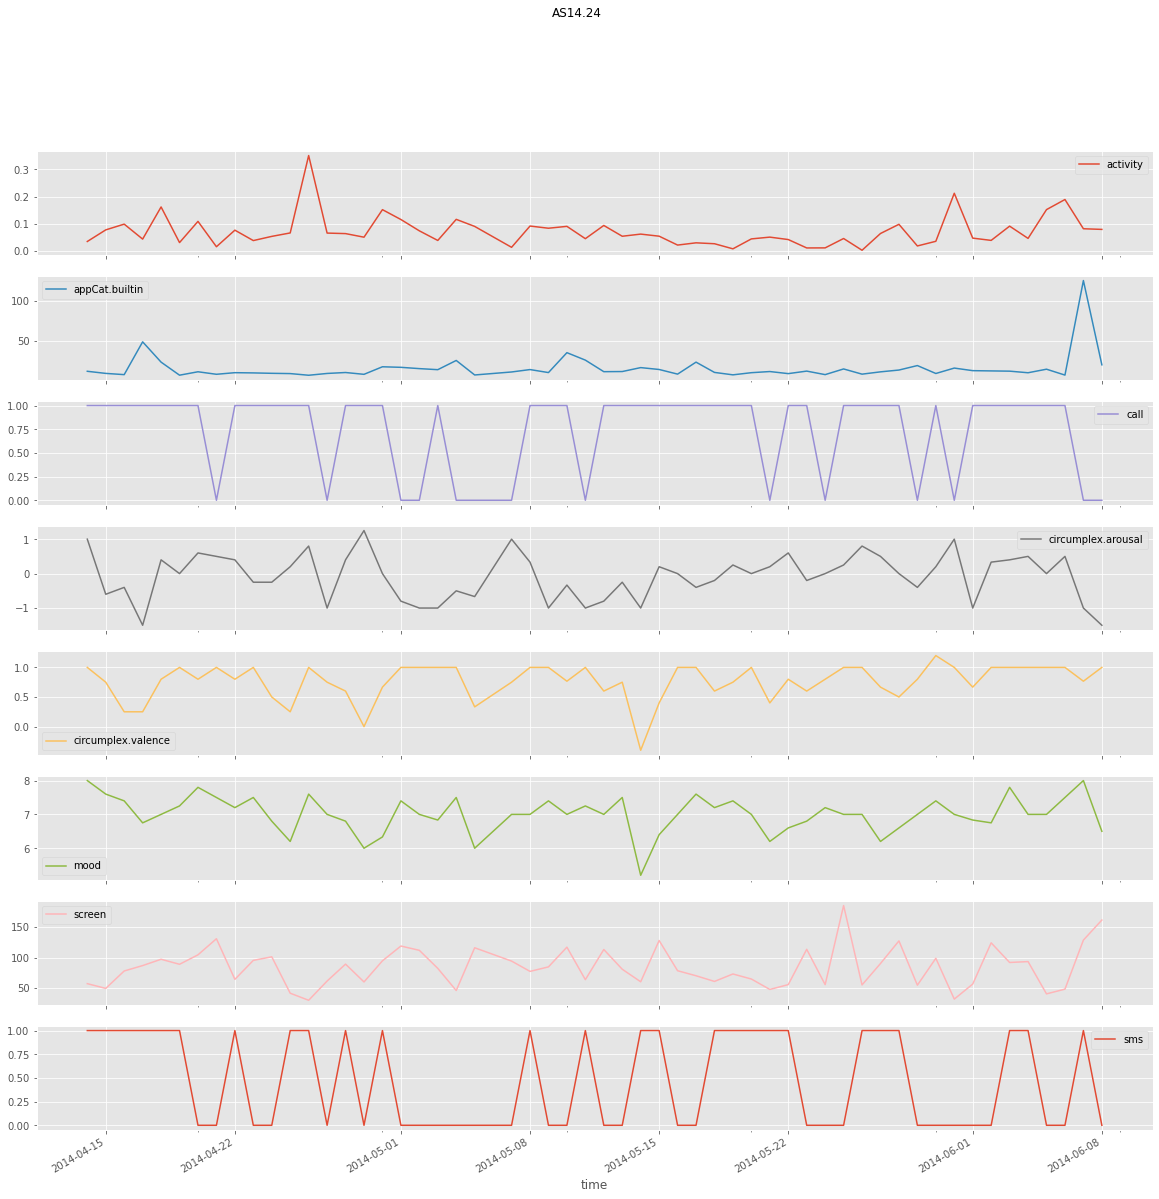

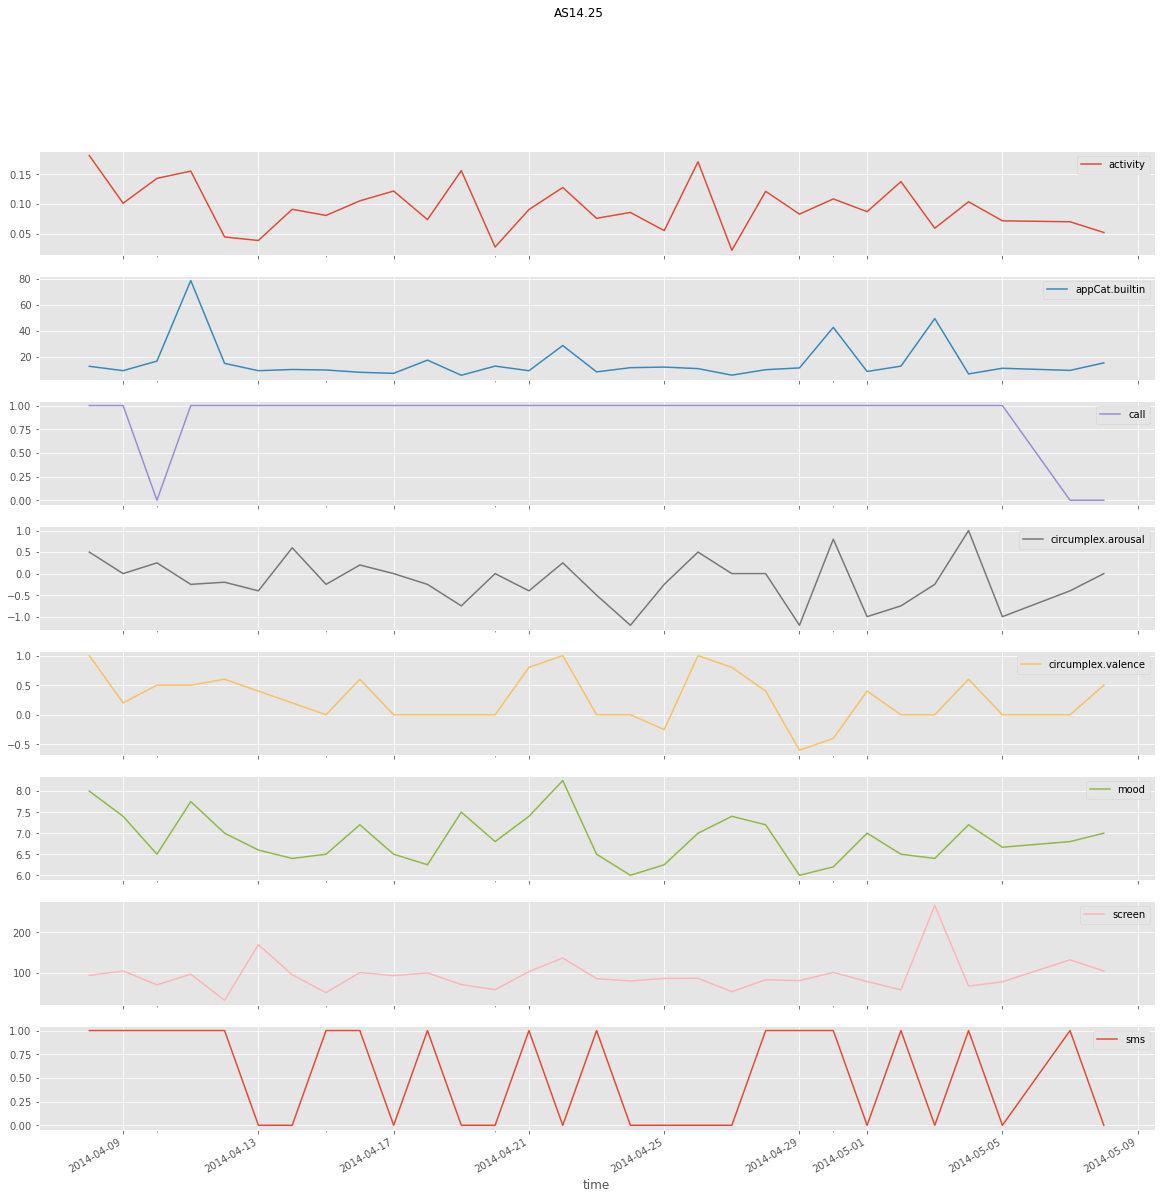

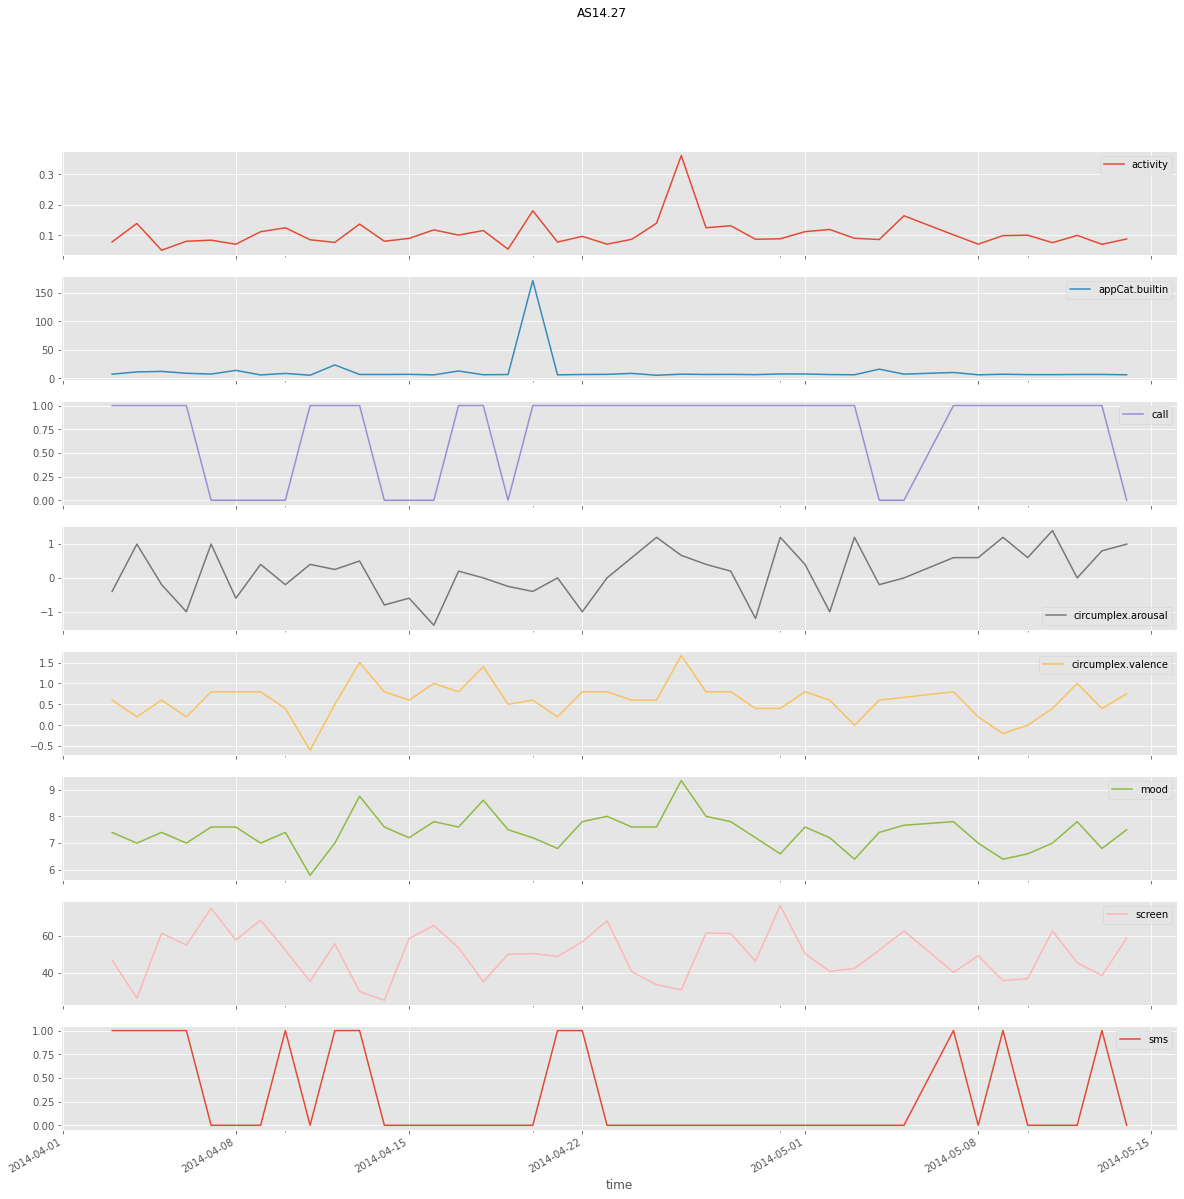

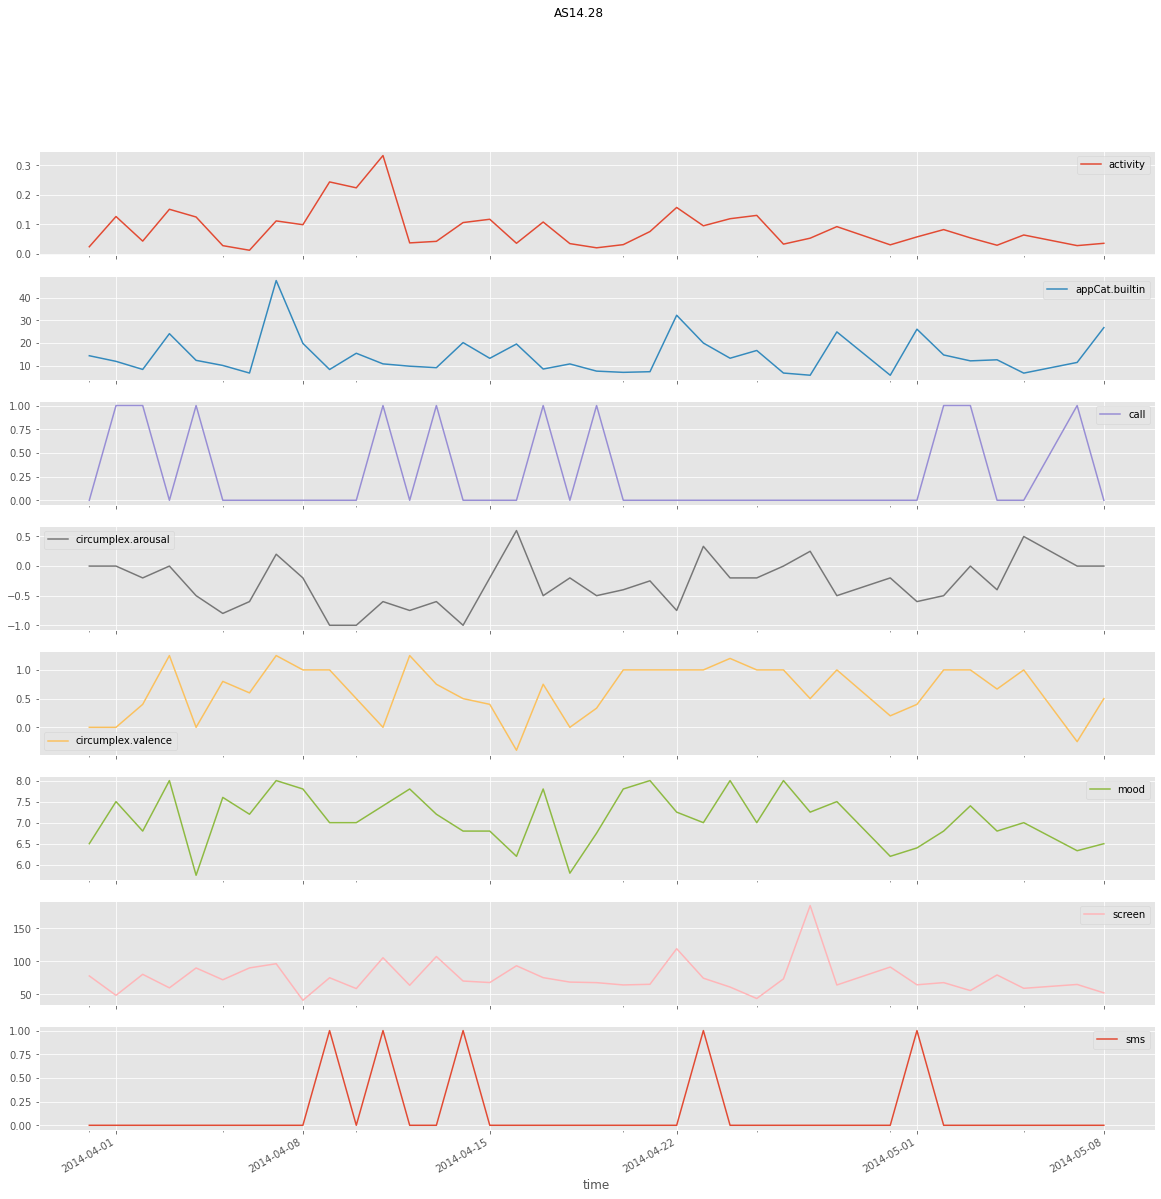

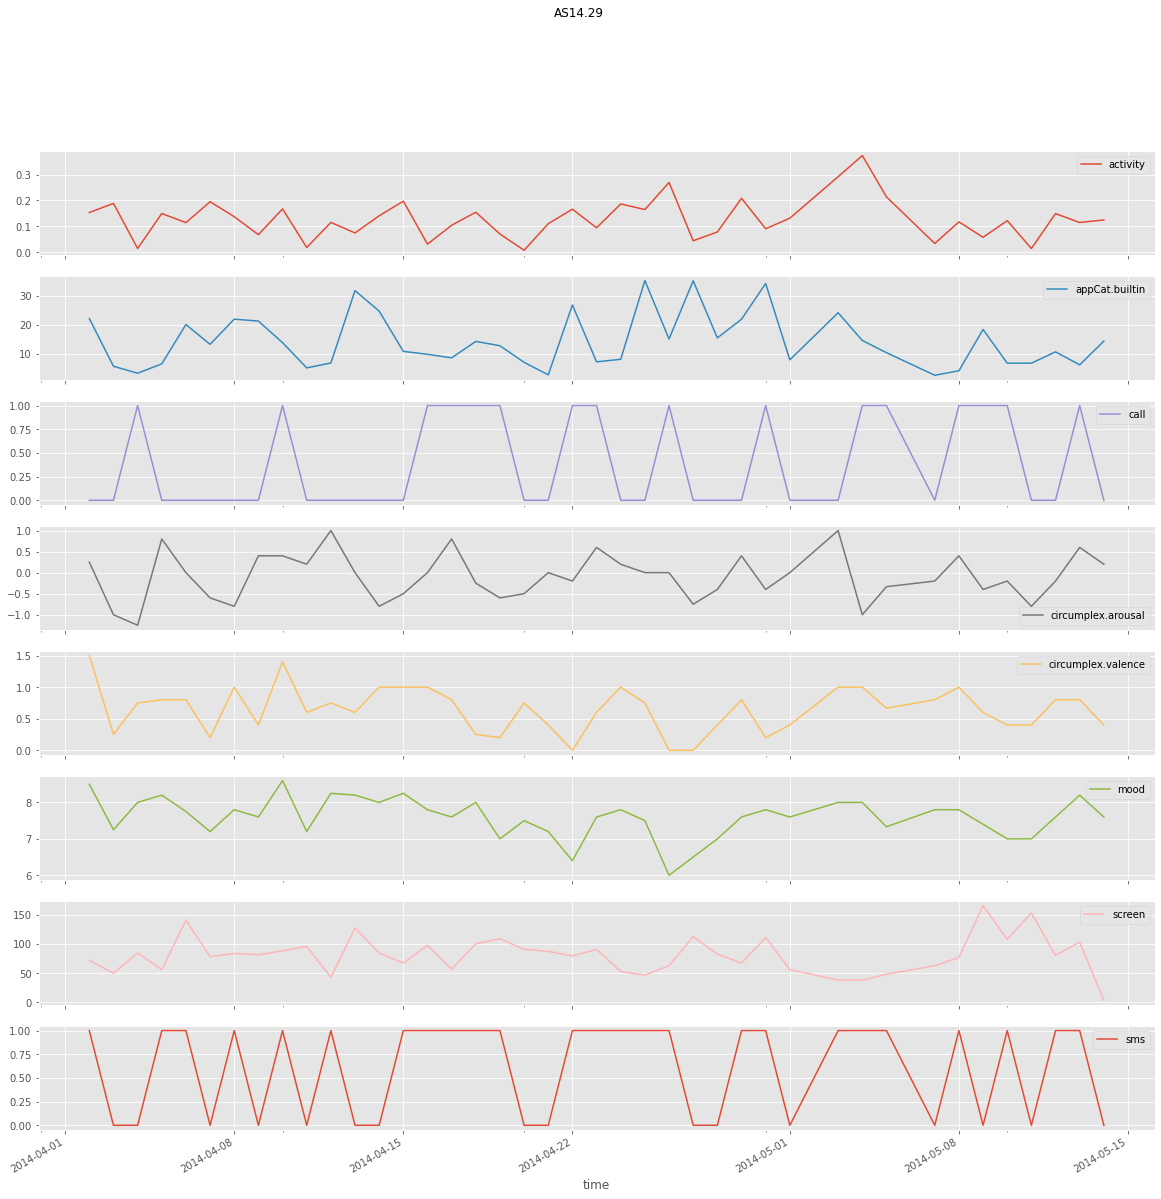

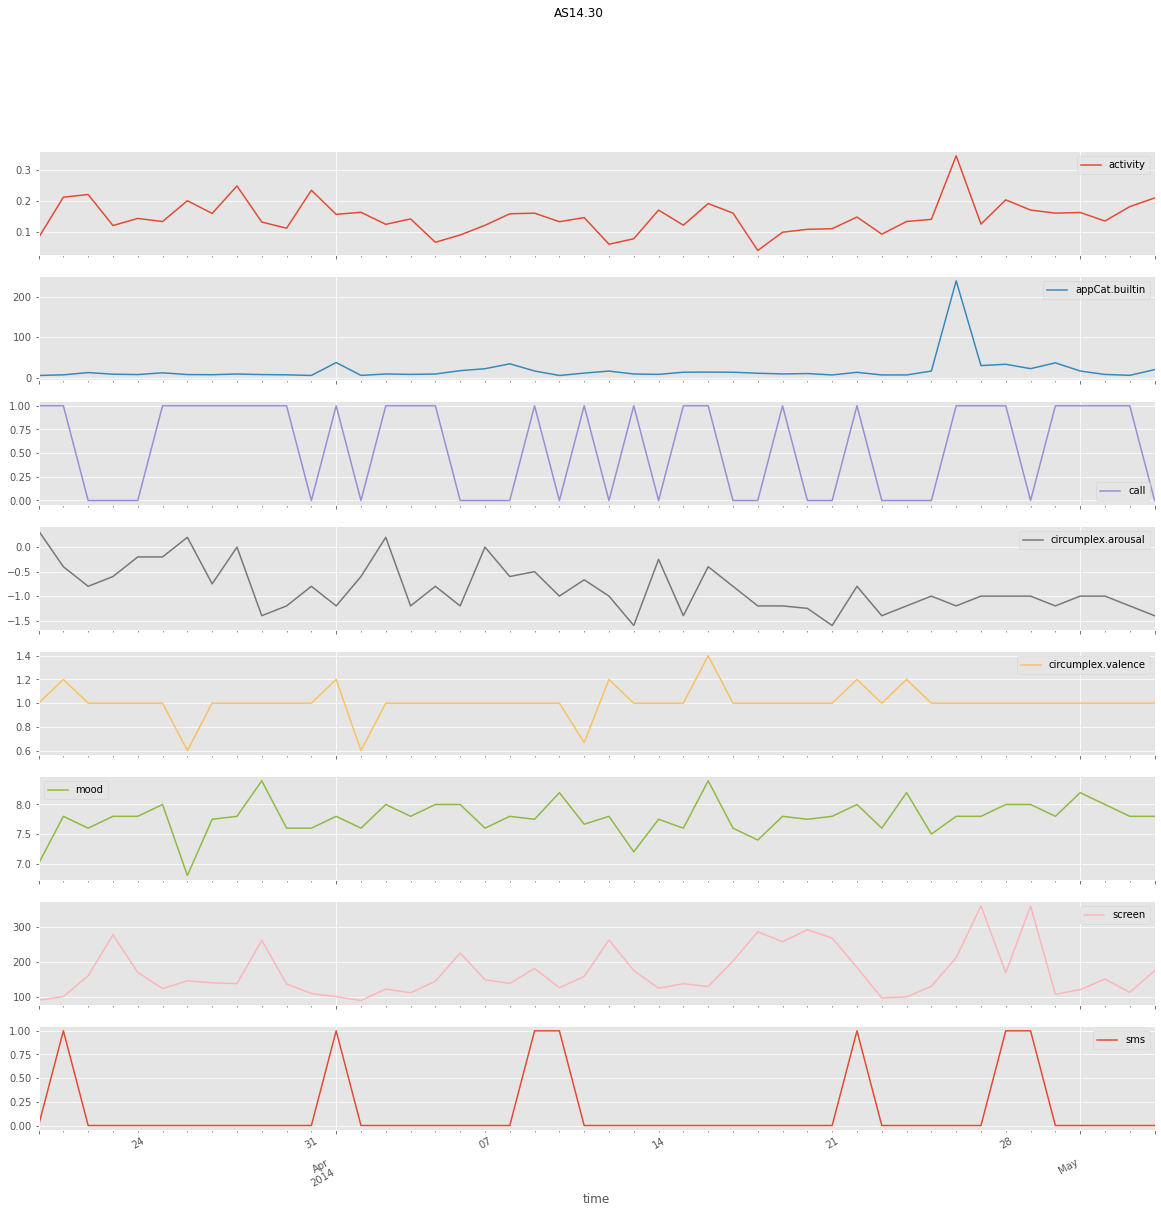

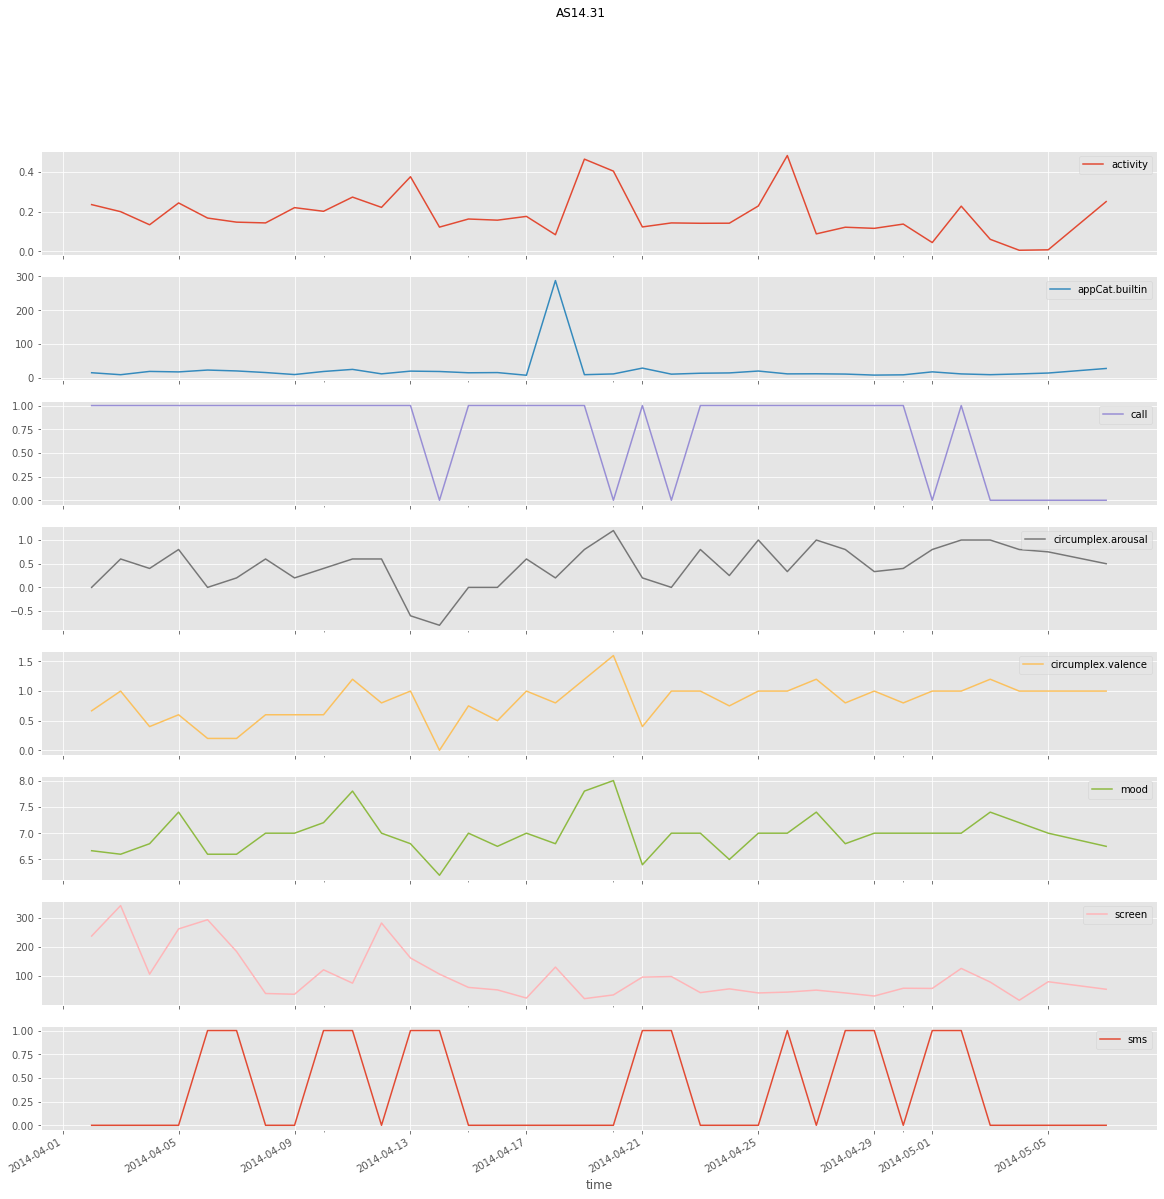

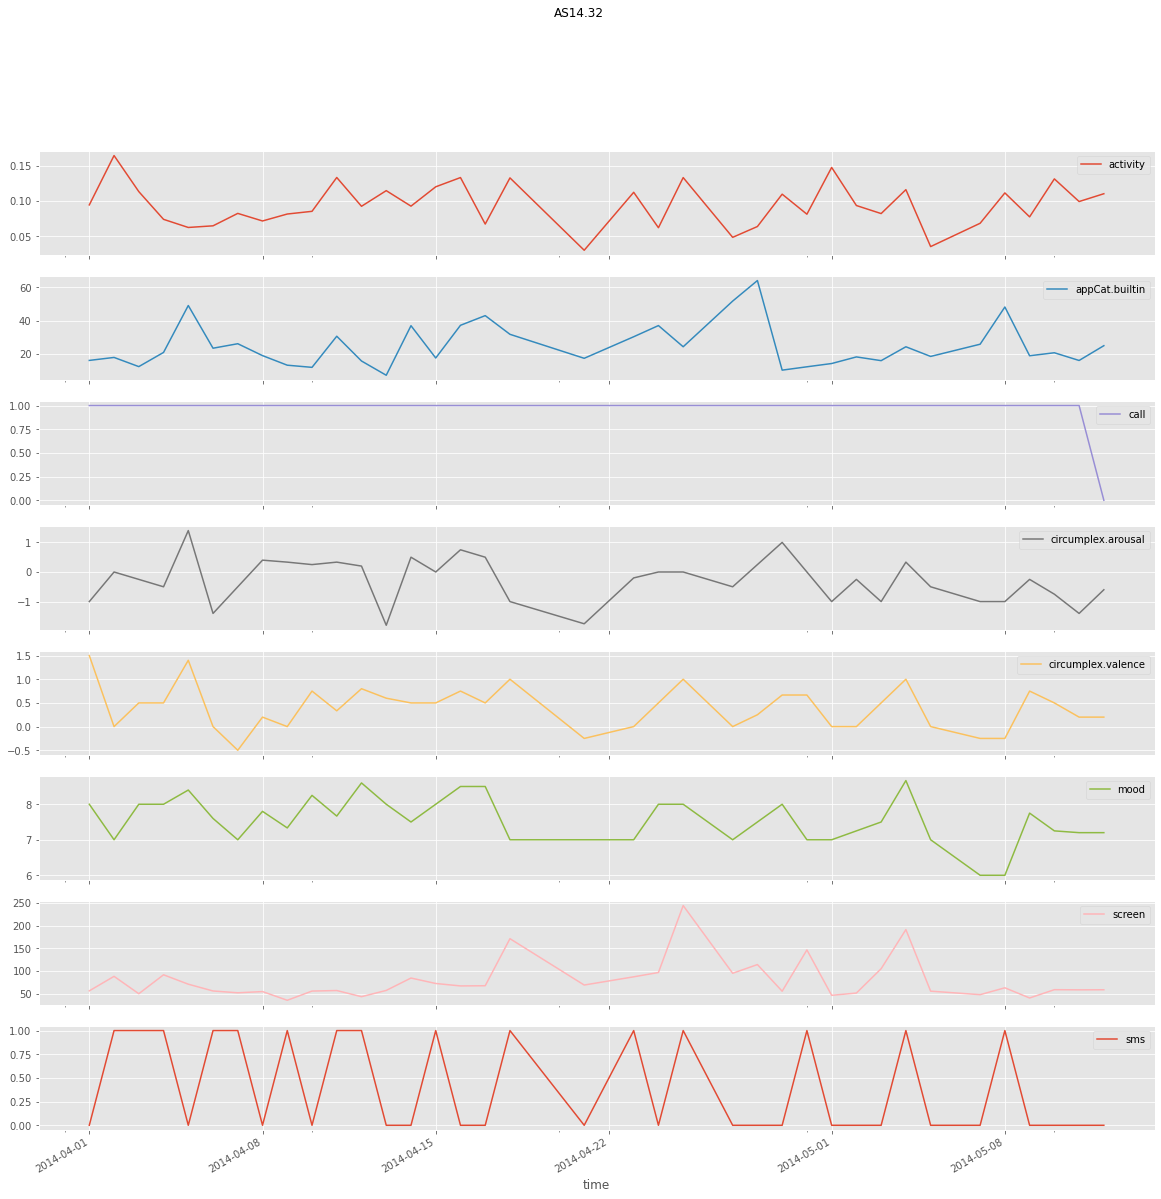

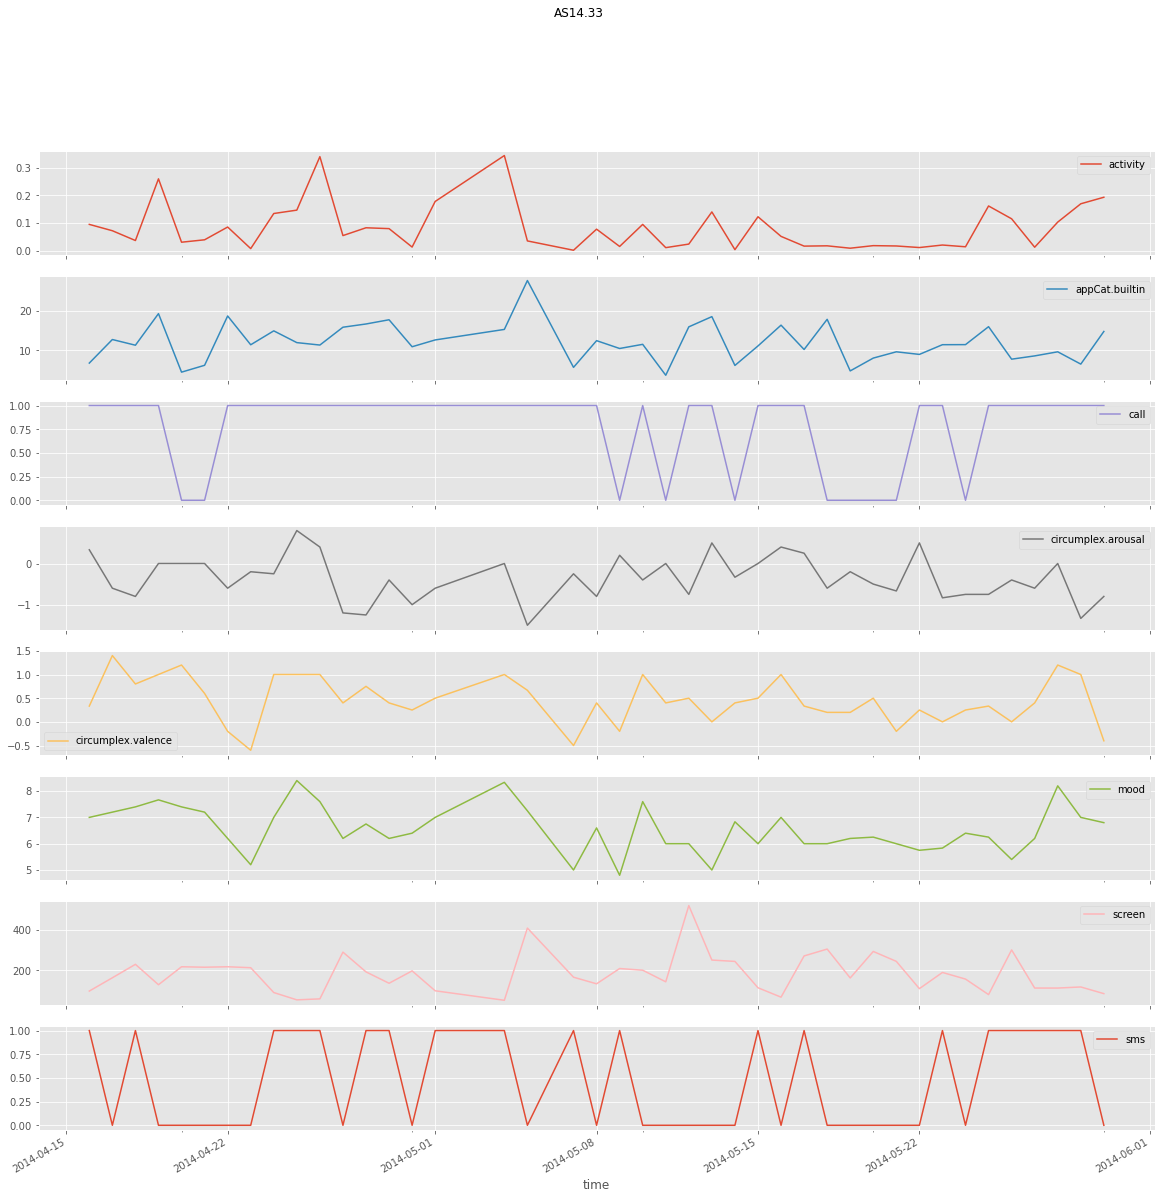

In [24]:
for id in cleanedata.keys():
    cleanedata[id].plot(subplots=True, figsize=(20,20), title=id)

In [27]:
lstdf = list()
for key in cleanedata.keys():
    lstdf.append(cleanedata[key])

df = pd.concat(lstdf)
del df["cut"]
df

variable    activity  appCat.builtin  call  circumplex.arousal  \
time                                                             
2014-03-21  0.134050       14.269173   1.0            0.200000   
2014-03-22  0.236880        7.781160   1.0            0.600000   
2014-03-23  0.142741       12.134396   0.0            0.200000   
2014-03-24  0.078961        4.982506   1.0            0.800000   
2014-03-25  0.098374       10.026874   0.0            0.500000   
...              ...             ...   ...                 ...   
2014-05-26  0.115201        7.711316   1.0           -0.400000   
2014-05-27  0.012704        8.545776   1.0           -0.600000   
2014-05-28  0.103301        9.590398   1.0            0.000000   
2014-05-29  0.169354        6.452161   1.0           -1.333333   
2014-05-30  0.192901       14.776845   1.0           -0.800000   

variable    circumplex.valence  mood      screen  sms  
time                                                   
2014-03-21                 0.2  6.20  153.665872  0.0  
2014-03-22                 0.5  6.40   47.613651  1.0  
2014-03-23                 0.8  6.80   67.067644  0.0  
2014-03-24                 0.0  6.00   76.772199  0.0  
2014-03-25                 0.5  6.75  169.097283  1.0  
...                        ...   ...         ...  ...  
2014-05-26                 0.0  5.40  300.399810  1.0  
2014-05-27                 0.4  6.20  113.607750  1.0  
2014-05-28                 1.2  8.20  113.657683  1.0  
2014-05-29                 1.0  7.00  118.978033  1.0  
2014-05-30                -0.4  6.80   86.342245  0.0  

[1108 rows x 8 columns]

In [29]:
df.to_csv("clean_data.csv")